In [1]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import io
import pandas as pd
import pandas_datareader.data as web
import pandas.plotting
from pandas.plotting import register_matplotlib_converters
import pandas.testing #pandas.testing.assert_frame_equal
from pandas.testing import assert_frame_equal #assert_frame_equal

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib import style

import mplfinance as mpf
import mpl_finance as mplf
from mpl_finance import candlestick_ohlc

import collections
from collections import Counter

import sklearn
from sklearn import svm, neighbors
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

style.use('ggplot')

C:\Users\JCW\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\JCW\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-13  1794.989990  1471.109985  1659.000000  1497.060059  38985400   
2020-07-14  1590.000000  1431.000000  1556.000000  1516.800049  23418100   
2020-07-15  1550.000000  1457.000000  1543.000000  1546.010010  16367800   
2020-07-16  1531.709961  1466.000000  1477.160034  1500.640015  14300800   
2020-07-17  1537.510010  1490.000000  1513.449951  1500.839966   9330000   
2020-07-20  1650.000000  1488.000000  1519.010010  1643.000000  17121400   
2020-07-21  1675.000000  1558.000000  1639.930054  1568.359985  16157300   
2020-07-22  1626.420044  1562.000000  1599.000000  1592.329956  14161100   
2020-07-23  1689.000000  1480.770020  1678.949951  1513.069946  24328500   
2020-07-24  1465.000000  1366.540039  1416.010010  1417.000000  19344700   

              Adj Close  
Date                     
2020-07-13  1497.060059  
2020-07-1

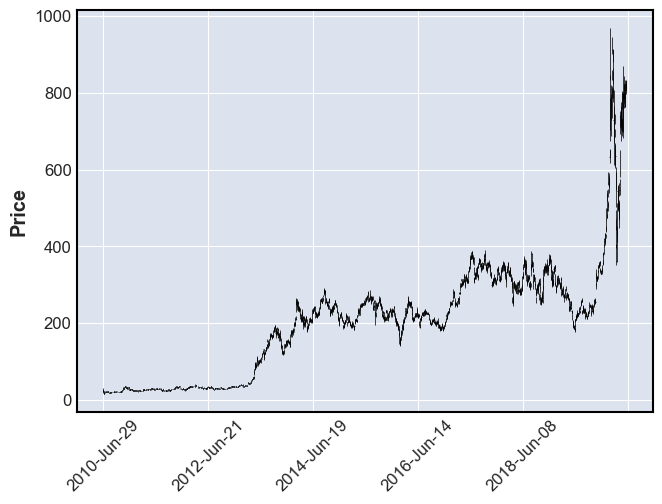

In [2]:
# Parts 1-3: Using Stock Market Data
# Here we are using Tesla (ticker = TSLA) as an example.
#df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 'Date')
start = dt.datetime(2000,1,1)
end = dt.datetime.now()
df = web.DataReader('TSLA', 'yahoo', start, end)

print(df.tail(10))

daily = pd.read_csv('C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/tsla.csv', index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)
mpf.plot(daily)

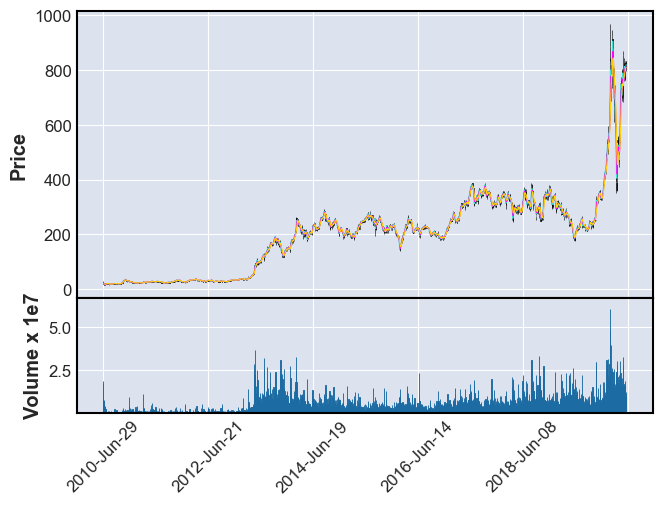

In [3]:
mpf.plot(daily, type='candle', mav = (3, 6, 9), volume = True)

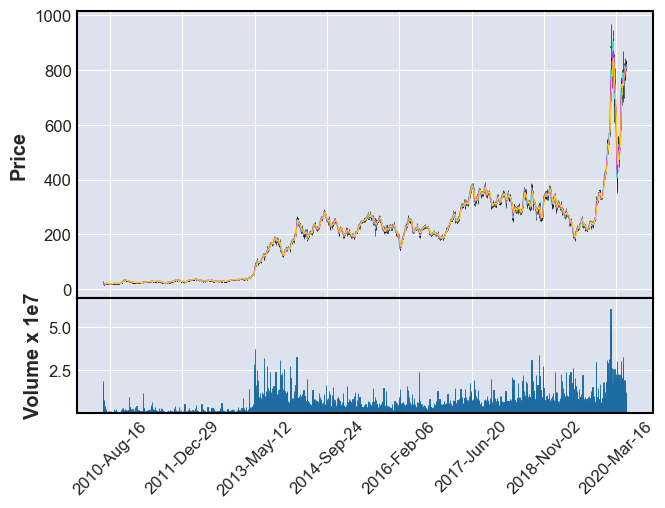

In [4]:
mpf.plot(daily, type = 'candle', mav =(3, 6, 9), volume = True, show_nontrading = True)

In [5]:
# Plot intraday data:
# intraday = pd.read_csv('examples/data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
# intraday = intraday.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
# intraday.index.name = 'Date'
# intraday.shape
# intraday.head(3)
# intraday.tail(3)


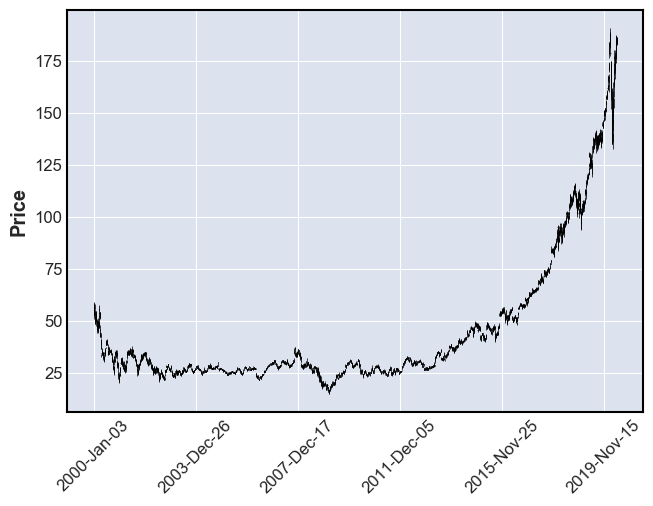

In [6]:
daily = pd.read_csv('C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/MSFT.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)
mpf.plot(daily)

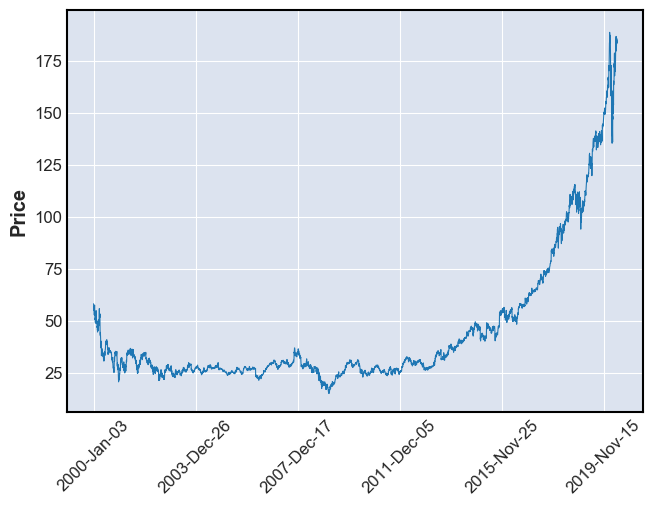

In [7]:
mpf.plot(daily, type='line')

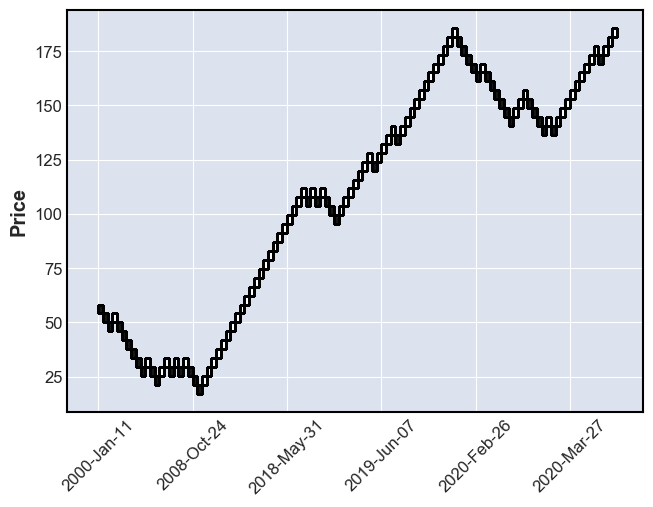

In [8]:
mpf.plot(daily, type='renko')

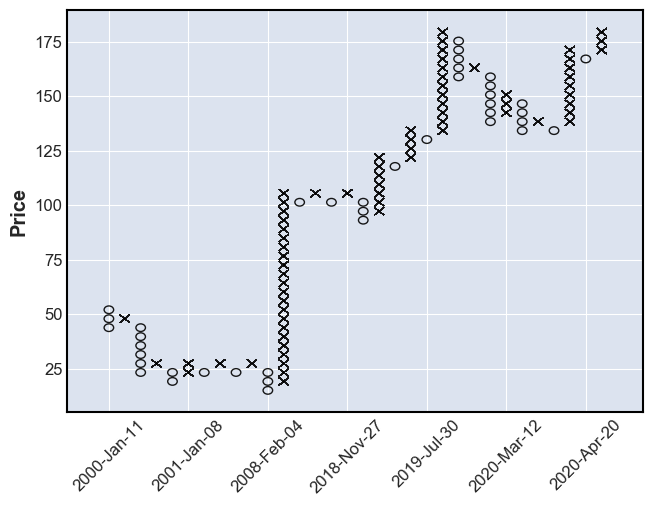

In [9]:
mpf.plot(daily, type='pnf')

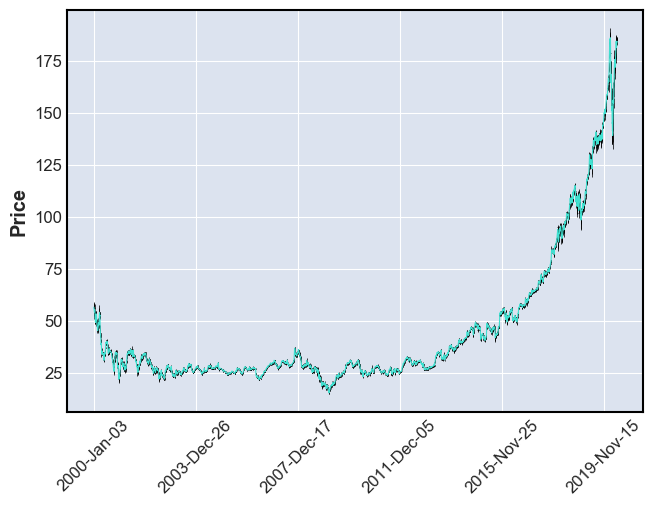

In [10]:
mpf.plot(daily, type = 'ohlc', mav=4)

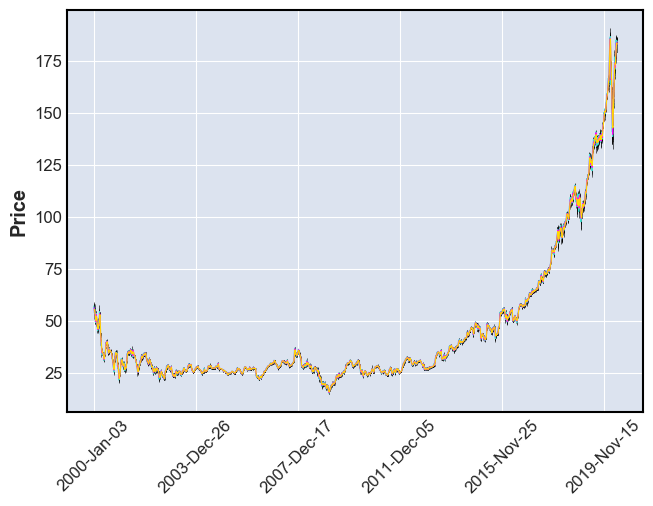

In [11]:
mpf.plot(daily, type='candle', mav=(3,6,9))

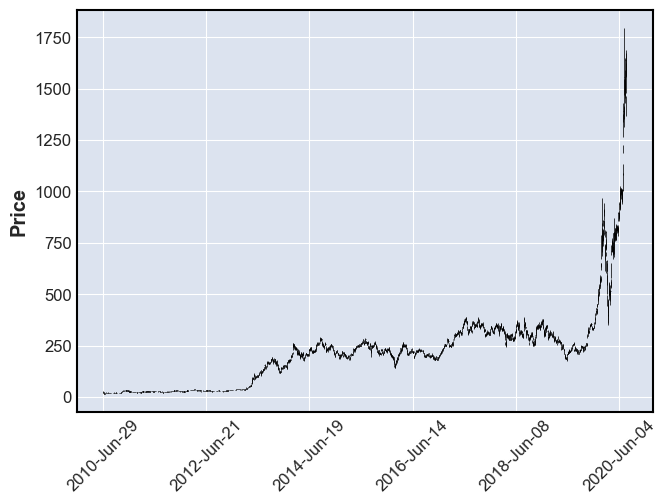

In [12]:
datafile = 'tsla.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Convert dates from string to datetime format
data.index = pd.to_datetime(data.index)
data

mpf.plot(data)

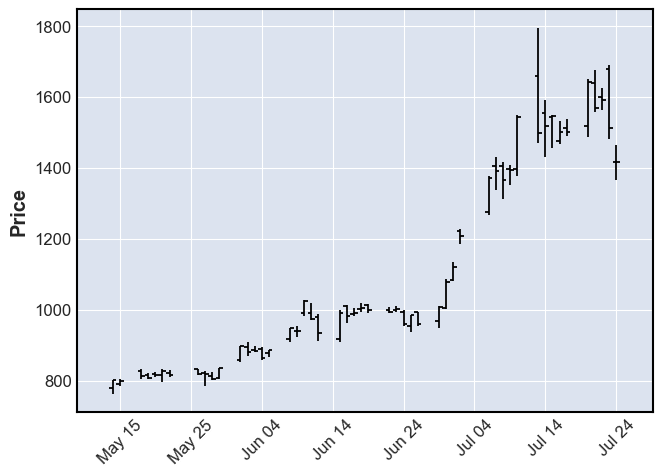

In [13]:
mpf.plot(data[-50:], show_nontrading = True)
plt.show()

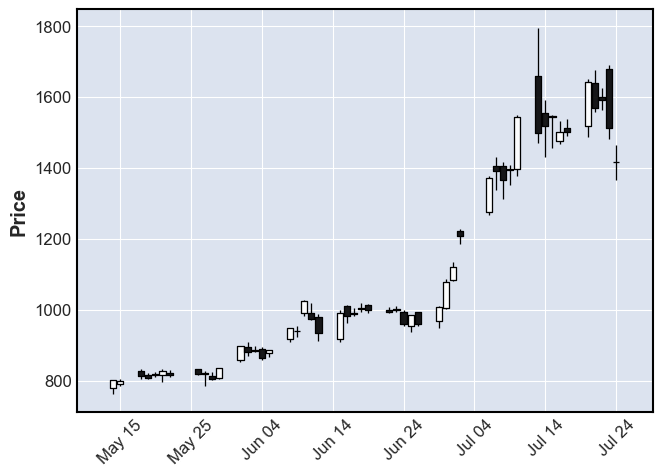

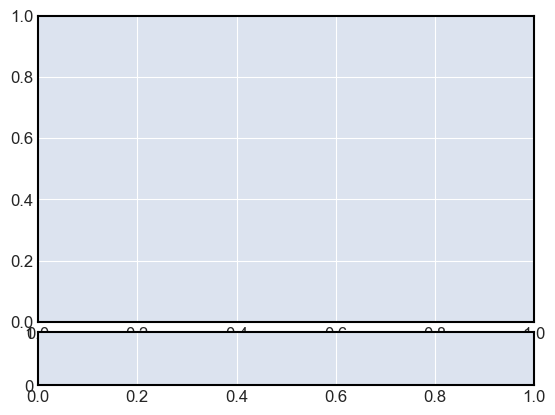

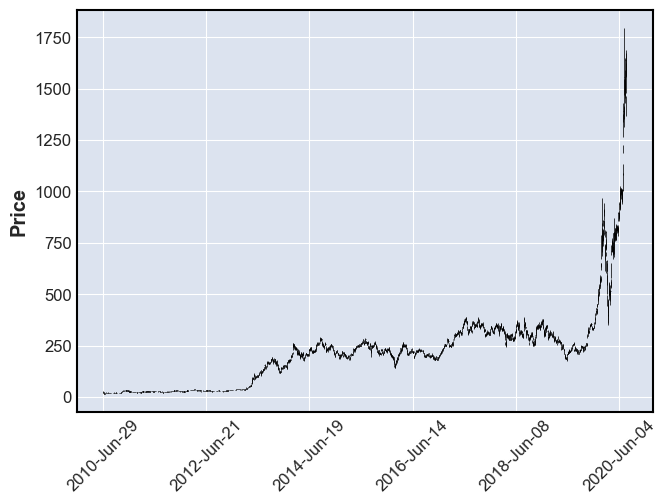

In [14]:
mpf.plot(data[-50:], type='candlestick', show_nontrading = True)
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

mpf.plot(data)
# only takes one positional argument??
#candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
#ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
#plt.show()

In [15]:
df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 'Date')

df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df.dropna(inplace = True)
print(df.tail())

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-20  1650.000000  1488.000000  1519.010010  1643.000000  17121400   
2020-07-21  1675.000000  1558.000000  1639.930054  1568.359985  16157300   
2020-07-22  1626.420044  1562.000000  1599.000000  1592.329956  14161100   
2020-07-23  1689.000000  1480.770020  1678.949951  1513.069946  24328500   
2020-07-24  1465.000000  1366.540039  1416.010010  1417.000000  19344700   

              Adj Close       100ma  
Date                                 
2020-07-20  1643.000000  833.681202  
2020-07-21  1568.359985  842.574802  
2020-07-22  1592.329956  851.818202  
2020-07-23  1513.069946  859.512701  
2020-07-24  1417.000000  866.227601  


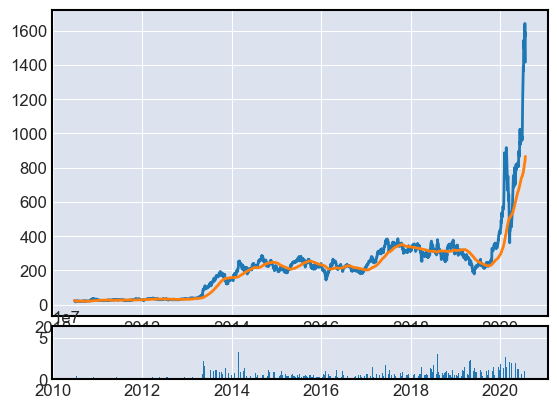

In [16]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [17]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)
print(df_ohlc.head())

        Date       open       high        low      close
0 2010-06-29  23.889999  23.889999  15.800000  17.459999
1 2010-07-09  17.400000  20.639999  17.049999  20.639999
2 2010-07-19  21.910000  21.910000  20.219999  20.719999
3 2010-07-29  20.350000  21.950001  19.590000  19.590000
4 2010-08-08  19.600000  19.600000  17.600000  19.150000


In [18]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

       Date       open       high        low      close
0  733952.0  23.889999  23.889999  15.800000  17.459999
1  733962.0  17.400000  20.639999  17.049999  20.639999
2  733972.0  21.910000  21.910000  20.219999  20.719999
3  733982.0  20.350000  21.950001  19.590000  19.590000
4  733992.0  19.600000  19.600000  17.600000  19.150000


In [19]:
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


In [20]:
#df.set_index('date', inplace=True) # set datetime.date as index
#print(f"type for datetime.date as index: {type(df.index)}")

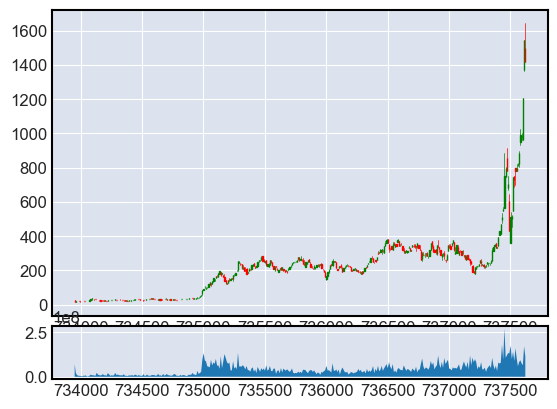

In [21]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

#mplfinance.plot(ax1, df_ohlc.values, width = 2, colorup = 'g')
# only takes one positional argument??
candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

In [22]:
# Part 4: Resampling
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
print(df.tail(10))

df_ohlc = df['Adj Close'].resample('10D').mean()

# Resample data for 10 day period
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)

# Convert datetime object to mdate
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-13  1794.989990  1471.109985  1659.000000  1497.060059  38985400   
2020-07-14  1590.000000  1431.000000  1556.000000  1516.800049  23418100   
2020-07-15  1550.000000  1457.000000  1543.000000  1546.010010  16367800   
2020-07-16  1531.709961  1466.000000  1477.160034  1500.640015  14300800   
2020-07-17  1537.510010  1490.000000  1513.449951  1500.839966   9330000   
2020-07-20  1650.000000  1488.000000  1519.010010  1643.000000  17121400   
2020-07-21  1675.000000  1558.000000  1639.930054  1568.359985  16157300   
2020-07-22  1626.420044  1562.000000  1599.000000  1592.329956  14161100   
2020-07-23  1689.000000  1480.770020  1678.949951  1513.069946  24328500   
2020-07-24  1465.000000  1366.540039  1416.010010  1417.000000  19344700   

              Adj Close       100ma  
Date                                 
2020-07-13 

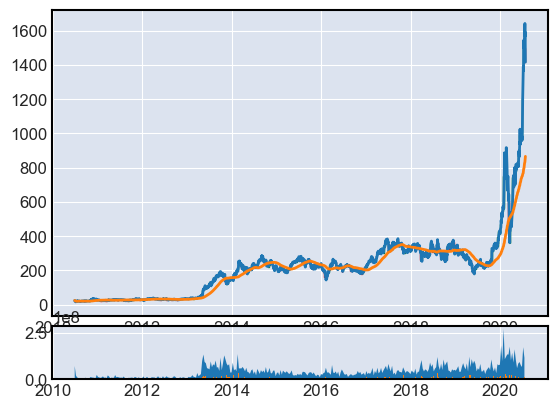

In [23]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 3, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
                 
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [24]:
"""
import bs4 as bs
import requests
import pandas as pd
 
def save_sp500_tickers(selectedsector):
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'id': 'constituents'})

    tickers = []
    industries = []

    for row in table.findAll('tr')[1:]:
            ticker = row.findAll('td')[0].text
            industry = row.findAll('td')[4].text

            tickers.append(ticker)
            industries.append(industry)

    tickers = list(map(lambda s: s.strip(), tickers))
    industries = list(map(lambda s: s.strip(), industries))

    tickerdf = pd.DataFrame(tickers,columns=['ticker'])
    sectordf = pd.DataFrame(industries,columns=['industry'])

    tickerandsector = pd.concat([tickerdf, sectordf], axis=1).reindex(tickerdf.columns)
    filtersector = tickerandsector.loc[tickerandsector['industry'] == 'Systems Software']

    listoftickers =  filtersector['ticker'].tolist()
    return listoftickers

save_sp500_tickers('Systems Software')
"""


"\nimport bs4 as bs\nimport requests\nimport pandas as pd\n \ndef save_sp500_tickers(selectedsector):\n    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')\n    soup = bs.BeautifulSoup(resp.text, 'lxml')\n    table = soup.find('table', {'id': 'constituents'})\n\n    tickers = []\n    industries = []\n\n    for row in table.findAll('tr')[1:]:\n            ticker = row.findAll('td')[0].text\n            industry = row.findAll('td')[4].text\n\n            tickers.append(ticker)\n            industries.append(industry)\n\n    tickers = list(map(lambda s: s.strip(), tickers))\n    industries = list(map(lambda s: s.strip(), industries))\n\n    tickerdf = pd.DataFrame(tickers,columns=['ticker'])\n    sectordf = pd.DataFrame(industries,columns=['industry'])\n\n    tickerandsector = pd.concat([tickerdf, sectordf], axis=1).reindex(tickerdf.columns)\n    filtersector = tickerandsector.loc[tickerandsector['industry'] == 'Systems Software']\n\n    listoftickers =  fil

In [25]:
"""
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = request.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'id': 'constituents'})
    print(table.findAll('tr')[1:])
    
    securities = []
    tickers = []
    industries = []
    sectors = []
    hqs = []
    added = []
    founded = []

    for row in table.findAll('tr')[1:]:
        security = row.findAll('td')[1].text
        ticker = row.findAll('td')[0].text
        industry = row.findAll('td')[4].text
        sector = row.findAll('td')[3].text
        hq = row.findAll('td')[5].text
        add = row.findAll('td')[6].text
        found = row.findAll('td')[8].text

        securities.append(security)
        tickers.append(ticker)
        industries.append(industry)
        sectors.append(sector)
        hqs.append(hq)
        added.append(add)
        founded.append(found)
        
    tickers = list(map(lambda s: s.strip(), tickers))
    industries = list(map(lambda s: s.strip(), industries))

    tickerdf = pd.DataFrame(tickers,columns=['ticker'])
    sectordf = pd.DataFrame(industries,columns=['industry'])

    tickerandsector = pd.concat([tickerdf, sectordf], axis=1, join_axes=[tickerdf.index])
    filtersector = tickerandsector.loc[tickerandsector['industry'] == selectedsector]

    listoftickers =  filtersector['ticker'].tolist()
    return listoftickers

save_sp500_tickers('Pharmaceuticals')
"""


"\nimport bs4 as bs\nimport pickle\nimport requests\n\ndef save_sp500_tickers():\n    resp = request.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')\n    soup = bs.BeautifulSoup(resp.text, 'lxml')\n    table = soup.find('table', {'id': 'constituents'})\n    print(table.findAll('tr')[1:])\n    \n    securities = []\n    tickers = []\n    industries = []\n    sectors = []\n    hqs = []\n    added = []\n    founded = []\n\n    for row in table.findAll('tr')[1:]:\n        security = row.findAll('td')[1].text\n        ticker = row.findAll('td')[0].text\n        industry = row.findAll('td')[4].text\n        sector = row.findAll('td')[3].text\n        hq = row.findAll('td')[5].text\n        add = row.findAll('td')[6].text\n        found = row.findAll('td')[8].text\n\n        securities.append(security)\n        tickers.append(ticker)\n        industries.append(industry)\n        sectors.append(sector)\n        hqs.append(hq)\n        added.append(add)\n        founded.append(

In [26]:
"""
securitydf = pd.DataFrame(securities,columns=['sector'])
tickerdf = pd.DataFrame(tickers,columns=['ticker'])
industrydf = pd.DataFrame(tickers,columns=['industry'])
sectordf = pd.DataFrame(tickers,columns=['sector'])
hqdf = pd.DataFrame(tickers,columns=['hq'])
addeddf = pd.DataFrame(tickers,columns=['added'])
foundeddf = pd.DataFrame(tickers,columns=['founded'])

#securityandtickerandindustryandsectorandhqandaddedandfounded = pd.concat([securitydf, tickerdf, industrydf, sectordf, hqdf, addeddf, foundeddf]), axis=1, join_axes=[tickerdf.index])
#print(securityandtickerandindustryandsectorandhqandaddedandfounded )
securityandticker = pd.concat([securitydf, tickerdf], axis=1, join_axes=[tickerdf.index])
print(securityandticker)
"""

"\nsecuritydf = pd.DataFrame(securities,columns=['sector'])\ntickerdf = pd.DataFrame(tickers,columns=['ticker'])\nindustrydf = pd.DataFrame(tickers,columns=['industry'])\nsectordf = pd.DataFrame(tickers,columns=['sector'])\nhqdf = pd.DataFrame(tickers,columns=['hq'])\naddeddf = pd.DataFrame(tickers,columns=['added'])\nfoundeddf = pd.DataFrame(tickers,columns=['founded'])\n\n#securityandtickerandindustryandsectorandhqandaddedandfounded = pd.concat([securitydf, tickerdf, industrydf, sectordf, hqdf, addeddf, foundeddf]), axis=1, join_axes=[tickerdf.index])\n#print(securityandtickerandindustryandsectorandhqandaddedandfounded )\nsecurityandticker = pd.concat([securitydf, tickerdf], axis=1, join_axes=[tickerdf.index])\nprint(securityandticker)\n"

In [27]:
# Part 5: Getting S&P500 List
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'id': 'constituents'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.strip()
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    print(tickers)

    return tickers

save_sp500_tickers()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO'

In [28]:
# Part 6: Getting Stock Prices
# Get data from Yahoo and call SP500 tickers list as sp500
def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

# Take all of the data for stocks and store in a directory
# Working with API, parsing website, take entire dataset and store locally
# Here we will look at Adjusted Close, but we can look at other columns later
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2020,5,28)

    # Grab all ticker data
    for ticker in tickers:
        print(ticker)    
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            except:
                print(f'Problems retrieving data for {ticker}. Skipping!')
            else:
                print('Already have {}'.format(ticker))

get_data_from_yahoo()

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BK
BAX
BDX
BRK.B
Problems retrieving data for BRK.B. Skipping!
BBY
BIO
BIIB
BLK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BF.B
Problems retrieving data for BF.B. Skipping!
CHRW
COG
CDNS
CPB
COF
CAH
KMX
CCL
CARR
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
COTY
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EOG
EFX
EQIX
EQR
ESS
EL
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FLIR
FLS
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS

In [29]:
# Part 7: Combine S&P500 List with Adjusted Close Price for All Companies
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
    mainDataSet = pd.DataFrame()

# Count in SP500 tickers list
    for count, ticker in enumerate(tickers):
        fileDataSet = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        fileDataSet.set_index('Date', inplace = True)
        fileDataSet.rename(columns = {'Adj Close':ticker}, inplace = True)
        fileDataSet.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace = True)

        if mainDataSet.empty:
            mainDataSet = fileDataSet
        else:
            mainDataSet = mainDataSet.join(fileDataSet)
        print(mainDataSet.head())
    mainDataSet.to_csv('sp500_joined_closes.csv')
compile_data()  

                  MMM
Date                 
2000-01-03  26.088079
2000-01-04  25.051456
2000-01-05  25.777090
2000-01-06  27.850321
2000-01-07  28.403187
                  MMM       ABT
Date                           
2000-01-03  26.088079  6.564564
2000-01-04  25.051456  6.377004
2000-01-05  25.777090  6.365284
2000-01-06  27.850321  6.588011
2000-01-07  28.403187  6.658342
                  MMM       ABT  ABBV
Date                                 
2000-01-03  26.088079  6.564564   NaN
2000-01-04  25.051456  6.377004   NaN
2000-01-05  25.777090  6.365284   NaN
2000-01-06  27.850321  6.588011   NaN
2000-01-07  28.403187  6.658342   NaN
                  MMM       ABT  ABBV      ABMD
Date                                           
2000-01-03  26.088079  6.564564   NaN  18.25000
2000-01-04  25.051456  6.377004   NaN  17.81250
2000-01-05  25.777090  6.365284   NaN  18.00000
2000-01-06  27.850321  6.588011   NaN  18.03125
2000-01-07  28.403187  6.658342   NaN  17.93750
                  MM

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.088079  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  25.051456  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  25.777090  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  27.850321  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  28.403187  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES       AFL          A        APD     AKAM  \
Date                                                                          
2000-01-03  15.500  NaN  28.296314  5.336146  44.294170  18.104057  321.250   
2000-01-04  14.625  NaN  27.174225  5.194542  40.910591  17.552309  300.000   
2000-01-05  15.000  NaN  27.466946  5.164732  38.372894  17.655748  283.500   
2000-01-06  16.000  NaN  27.686485  5.269069  36.911816  18.82821

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.088079  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  25.051456  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  25.777090  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  27.850321  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  28.403187  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  ALGN  ALLE       LNT        ALL  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.296314  ...   NaN   NaN  5.336293  14.326738   
2000-01-04  14.625  NaN  27.174225  ...   NaN   NaN  5.336293  13.869501   
2000-01-05  15.000  NaN  27.466946  ...   NaN   NaN  5.597509  14.479142   
2000-01-06  16.000  NaN  27.686485  ...   NaN   NaN  5.597509  14.402937   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.088079  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  25.051456  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  25.777090  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  27.850321  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  28.403187  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  AAL        AEP        AXP  \
Date                                ...                              
2000-01-03  15.500  NaN  28.296314  ...  NaN  12.473226  34.683704   
2000-01-04  14.625  NaN  27.174225  ...  NaN  12.622015  33.374104   
2000-01-05  15.000  NaN  27.466946  ...  NaN  13.093165  32.526413   
2000-01-06  16.000  NaN  27.686485  ...  NaN  13.167562  33.189102   
2000-01-07  16.250  NaN  28.223131  ... 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.088079  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  25.051456  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  25.777090  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  27.850321  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  28.403187  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       APH        ADI      ANSS  ANTM  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.296314  ...  3.851934  30.452473  2.765625   NaN   
2000-01-04  14.625  NaN  27.174225  ...  3.719480  28.911892  2.687500   NaN   
2000-01-05  15.000  NaN  27.466946  ...  3.637143  29.333982  2.703125   NaN   
2000-01-06  16.000  NaN  27.686485  ...  3.536906  28.532043

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.088079  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  25.051456  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  25.777090  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  27.850321  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  28.403187  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      AAPL       AMAT  APTV       ADM  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.296314  ...  3.460857  24.005121   NaN  7.019731   
2000-01-04  14.625  NaN  27.174225  ...  3.169071  22.819094   NaN  6.946610   
2000-01-05  15.000  NaN  27.466946  ...  3.215448  21.965160   NaN  6.836923   
2000-01-06  16.000  NaN  27.686485  ...  2.937188  22.000732

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.088079  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  25.051456  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  25.777090  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  27.850321  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  28.403187  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...          T       ATO      ADSK  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.296314  ...  17.282593  8.780582  8.052903   
2000-01-04  14.625  NaN  27.174225  ...  16.271378  8.561753  7.660817   
2000-01-05  15.000  NaN  27.466946  ...  16.524181  8.835291  7.178246   
2000-01-06  16.000  NaN  27.686485  ...  16.175280  8.698522  6.740915   
2000-01-07  16.2

FileNotFoundError: [Errno 2] File stock_dfs/BRK.B.csv does not exist: 'stock_dfs/BRK.B.csv'

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.893019  0.860516  0.831091  0.929641  0.937732  0.821938   
ABT   0.893019  1.000000  0.807910  0.836226  0.982169  0.901335  0.952726   
ABBV  0.860516  0.807910  1.000000  0.850064  0.875705  0.909991  0.863064   
ABMD  0.831091  0.836226  0.850064  1.000000  0.867083  0.895662  0.888230   
ACN   0.929641  0.982169  0.875705  0.867083  1.000000  0.938403  0.949021   

           AMD       AAP       AES  ...       ADP       AZO       AVB  \
MMM   0.036350  0.881506 -0.165910  ...  0.905882  0.907708  0.926804   
ABT   0.257019  0.833583 -0.058566  ...  0.980265  0.951354  0.914144   
ABBV  0.693162  0.246672  0.517490  ...  0.841076  0.622128  0.722252   
ABMD  0.299230  0.682059  0.036196  ...  0.881256  0.747477  0.730610   
ACN   0.378448  0.852247  0.328958  ...  0.989741  0.958273  0.935694   

           AVY       BKR       BLL       BAC        BK       BAX       BDX  
MMM   0.855544 

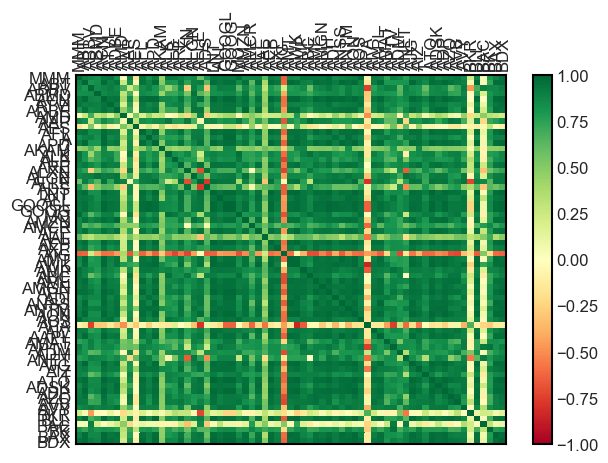

In [30]:
# Part 8: Correlation Tables & Data Visualization
# Visualizing data from the SP500 close price csv 
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')

# Example of plotting one company close price over time for Apple (ticker = AAPL) 
#    df['AAPL'].plot()
#    plt.show()

# Create correlation table for all data in df for SP500 close price
    df_corr = df.corr()
    print(df_corr.head())
# Visualize inner values of dataframe (numpy array of columns and rows)
# Specify figure and define axes using parameters(111) : one subplot is 1x1 for plot 1)
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

# Define heatmap using a range from red to yellow to green
# Red = Negative, Yellow = Neutral, Green = Positive
# Colorbar for legend
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
# Build graph
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor = False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    column_labels = df_corr.columns
    row_labels = df_corr.index
# Make x labels vertical, set limit of colors (-1 = min, 1 = max)
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()
visualize_data()

# Next create features/labels, use ML for trading strategy & possible investments.	

In [31]:
# Part 9: Preprocessing Data for Machine Learning (ML) Model
# Part 10: Setting Target
# Part 11: Generate Labels

# svm = support-vector machine
# Cross validation to shuffle data and create training & testing samples  
# Voting classifier - use many classifiers, let them voite on best classifier

# For tutorials on Practical Machine Learning with Python visit: /
# https://pythonprogramming.net/machine-learning-tutorial-python-introduction/

# Machine Learnings: Preprocess Data for Trading Strategy

# Disclaimer: This script is for educational purposes only.
# To build more accurate ML models, you might focus on specific time frames (i.e. 1-2 yrs)
# Further, you might need more data.
# We use one-day data because it is available for free.

In [32]:
# Create features/labels, use ML for trading strategy & possible investments.	
# Theory: groups of companies might move up/down together (using pricing data).
# Take S&P500 dataset (closing price over time, 2000-2020), use machine learning.
# Normalize dataset by converting pricing data to % change
# Features = define, labels = target
# Labels = Buy, Sell, or Hold

# Take feature data and determine label by asking:
# "Within next 7 trading days did price go up more than x% (i.e. 2%)?"
# If yes, sell company.
# If no, hold company.

# Each model generated per company
# Each company model considers pricing data from entire SP500 dataset
# To look further into the future, i.e. 30 days, change to "hm_days = 30:
def process_data_for_labels(ticker):
    hm_days = 7
    fileDataSet = pd.read_csv('sp500_joined_closes.csv', index_col = 0)
    tickers = fileDataSet.columns.values.tolist()
    fileDataSet.fillna(0, inplace = True)

# Preprocessing Data for ML

# The range will go up to a certain point (for 7 days)  
# Create custom dataset to predict future values based on percentage change
# Value in percent change = price in two days from now
# less today's price, divided by today's price, multiplied by 100.
    for i in range(1, hm_days+1):
        fileDataSet['{}d'.format(ticker, i)] = (fileDataSet[ticker].shift(-i) - fileDataSet[ticker]) / fileDataSet[ticker]

    fileDataSet.fillna(0, inplace = True)
    return tickers, fileDataSet

# Here we look at " " company (ticker = " ")
process_data_for_labels('BAC')

(['MMM',
  'ABT',
  'ABBV',
  'ABMD',
  'ACN',
  'ATVI',
  'ADBE',
  'AMD',
  'AAP',
  'AES',
  'AFL',
  'A',
  'APD',
  'AKAM',
  'ALK',
  'ALB',
  'ARE',
  'ALXN',
  'ALGN',
  'ALLE',
  'ADS',
  'LNT',
  'ALL',
  'GOOGL',
  'GOOG',
  'MO',
  'AMZN',
  'AMCR',
  'AEE',
  'AAL',
  'AEP',
  'AXP',
  'AIG',
  'AMT',
  'AWK',
  'AMP',
  'ABC',
  'AME',
  'AMGN',
  'APH',
  'ADI',
  'ANSS',
  'ANTM',
  'AON',
  'AOS',
  'APA',
  'AIV',
  'AAPL',
  'AMAT',
  'APTV',
  'ADM',
  'ANET',
  'AJG',
  'AIZ',
  'T',
  'ATO',
  'ADSK',
  'ADP',
  'AZO',
  'AVB',
  'AVY',
  'BKR',
  'BLL',
  'BAC',
  'BK',
  'BAX',
  'BDX'],
                    MMM        ABT       ABBV        ABMD         ACN  \
 Date                                                                   
 2000-01-03   26.088079   6.564564   0.000000   18.250000    0.000000   
 2000-01-04   25.051456   6.377004   0.000000   17.812500    0.000000   
 2000-01-05   25.777090   6.365284   0.000000   18.000000    0.000000   
 2000-01-06   27

In [33]:
# Next, generate labels for targets using machine learning for investing with Python
# Based on percent change pricing information, should we buy, sell, or hold company?

# See mapping functions tutorials at https://pythonprogramming.net/python-function-mapping-pandas/
# Args and kwargs tutorials at https://pythonprogramming.net/args-kwargs-intermediate-python-tutorial/

# We will also back-test out strategy.
# Example here using percent change = 2% in a week.
# If company stock price changes by 2% in 7 days get out of position for that company.
# 0 = hold, -1 = sell, +1 = buy
# If data is inbalanced you can adjust the algorithm for higher accuracy
# Aiming for > 33% accuracy (for this example)
# Example if you are incorrect on the hold, did not think it would change more than 2%, but it did...
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [34]:
# Part 11 ML Labels
# Map the function above to a column
def extract_featuresets(ticker):
    tickers, fileDataSet = process_data_for_labels(ticker)

# Define new column, value = mapped function using arg
# Arg = 7-day & change for future price; Pass paramters to function
# Generate labels for buy, sell, or hold
    fileDataSet['{}_target'.format(ticker)] = list(map(buy_sell_hold, fileDataSet[[c for c in fileDataSet.columns if c not in tickers]].values))

    vals = fileDataSet['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    
# List of options
    fileDataSet.fillna(0, inplace = True)
    fileDataSet = fileDataSet.replace([np.inf, -np.inf], np.nan)
    fileDataSet.dropna(inplace = True)

# Normalizing data set for ticker (prices) by using percent change.
    fileDataSet_vals = fileDataSet[[ticker_name for ticker_name in tickers]].pct_change()
    fileDataSet_vals = fileDataSet_vals.replace([np.inf, -np.inf], 0)
    fileDataSet_vals.fillna(0, inplace = True)

    X = fileDataSet_vals.values
    y = fileDataSet['{}_target'.format(ticker)].values

    return X, y, fileDataSet

extract_featuresets('BAC')

Data spread: Counter({'0': 2032, '1': 1689, '-1': 1412})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.0397355 , -0.0285716 ,  0.        , ..., -0.02871637,
         -0.02240291, -0.02625283],
        [ 0.02896573, -0.00183788,  0.        , ..., -0.02260866,
          0.04374978,  0.00735288],
        ...,
        [ 0.03851406, -0.02175574, -0.01509228, ...,  0.06927534,
         -0.01633496, -0.02553814],
        [ 0.03991315,  0.01430486, -0.00804758, ...,  0.04554081,
          0.01087592,  0.0071202 ],
        [-0.00840965,  0.01476417,  0.00055563, ..., -0.02540834,
          0.02036088,  0.02853491]]),
 array([-1,  1,  1, ...,  0,  0,  0], dtype=int64),
                    MMM        ABT       ABBV        ABMD         ACN  \
 Date                                                                   
 2000-01-03   26.088079   6.564564   0.000000   18.250000    0.000000   
 2000-01-04   25.051456   6.377004   0.000000   17.812500    0.000000   
 2000-01-05   25.777090   6.3

In [35]:
# Create new Machine Learning function
# Create training and testing, 25% sample data will be tested against for accuracy

# Create classifier, define
# X_train is (fileDataset_vals, above) the percent change data for all companies, including company testing for
# y is the target classification (0 = hold, 1 = buy, -1 = sell)
# Use classifier that will fit input data to target 
# clf = neighbors.KNeighborsClassifier()
#
#    clf.fit(X_train, y_train)
#    confidence = clf.score(X_test, y_test)
#    print('Accuracy', confidence)

# Going forward, if you train and do not wish to retrain this model (above) pickle the classifier
# Load the pickle file, clf.predict will run and return list of predictions
# predictions = clf.predict(X_test)
# print('Predicted spread:', Counter(predictions))
#
# print('Confidence:', Counter(confidence))   
#    return confidence

# Here we are looking at Bank of America (ticker = BAC)
# do_ml('BAC')

# Example Output: 0 = hold, -1 = sell, 1 = buy (for BAC we had more holds, followed by sells and least for buys)
# Data spread: Counter({'0': 2558, '1': 1462, '-1': 1110})
# Data spread: Counter({'0': 2026, '1': 1701, '-1': 1403})
# Accuracy 0.38347622759158223
# Predicted spread: Counter({0: 758, -1: 318, 1: 207})

In [36]:
# Part 12: ML Algorithm with Voting Classifier 
# Repeat above using Voting Classifier
def do_ml(ticker):
    X, y, fileDataSet = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    #clf = neighbors.KNeighborsClassifier()
# Replace simple classifier with voting classifier:
# Voting classifier will take list of tuples of classifier by name, classifier
# List contains tuples (i.e. 3 classifiers: linear svc, neigbors, random forest classifiers) 
    #clf = VotingClassifier([('lsvc', svm.LinearSVC()),
    clf = VotingClassifier([('lsvc', LinearSVC()), 
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy', confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))

    return confidence

do_ml('BAC')

Data spread: Counter({'0': 2032, '1': 1689, '-1': 1412})
Accuracy 0.42834890965732086
Predicted spread: Counter({0: 864, -1: 230, 1: 190})


0.42834890965732086

In [37]:
# STOCK MARKET DATA VISUALIZATIONS
# Loading data into dataframe:
datafile = 'MSFT.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]


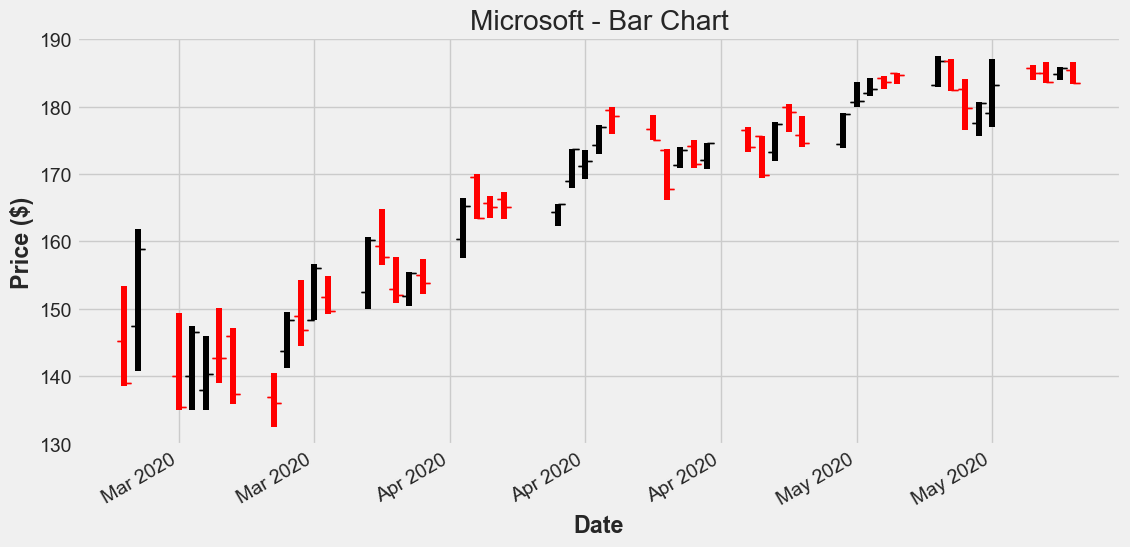

In [38]:
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Microsoft - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

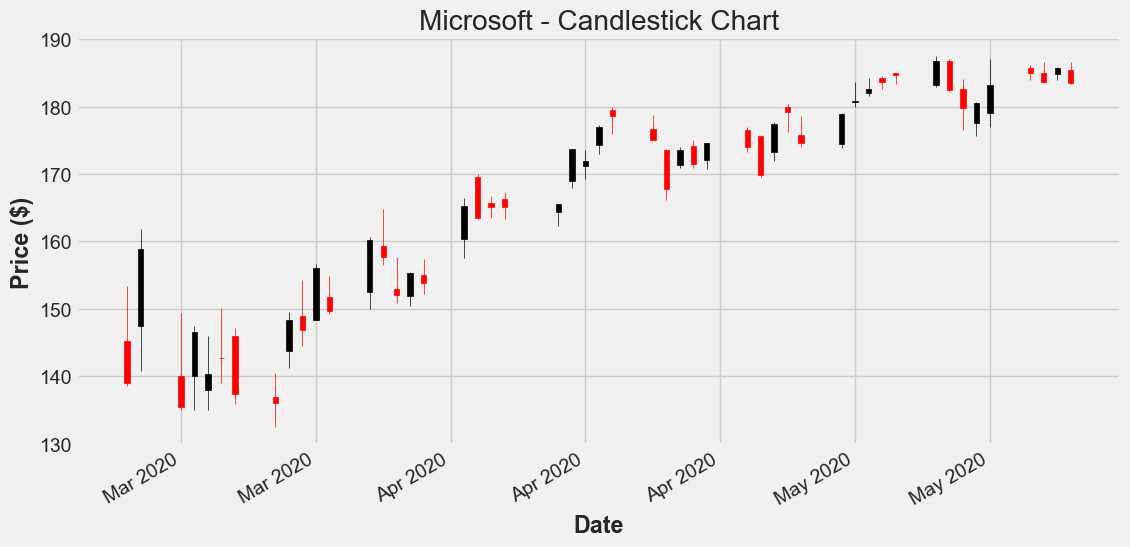

In [39]:
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Microsoft - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

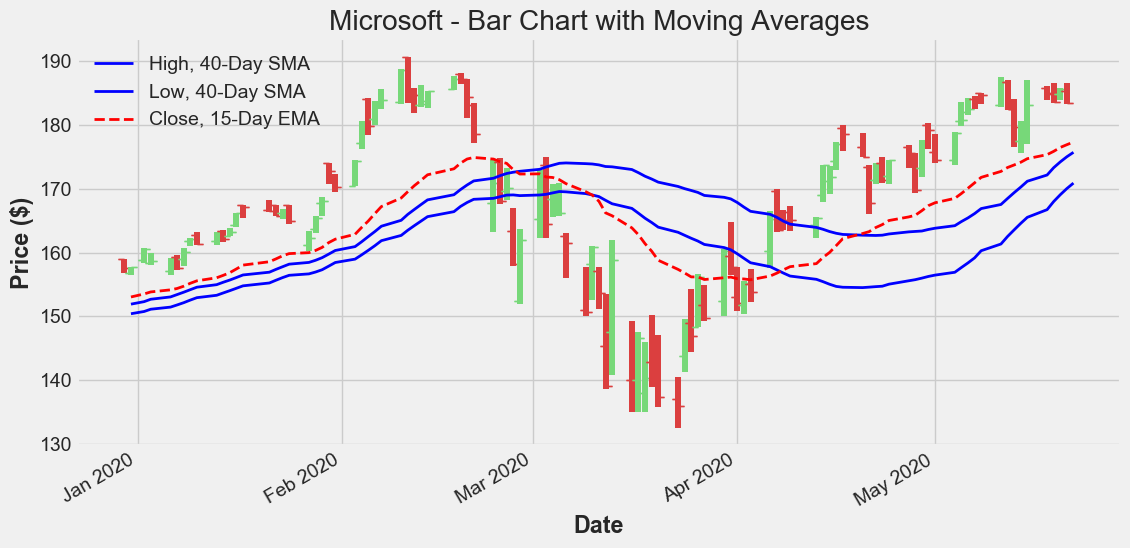

In [40]:
# Loading data into dataframe:
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/MSFT.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Microsoft - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


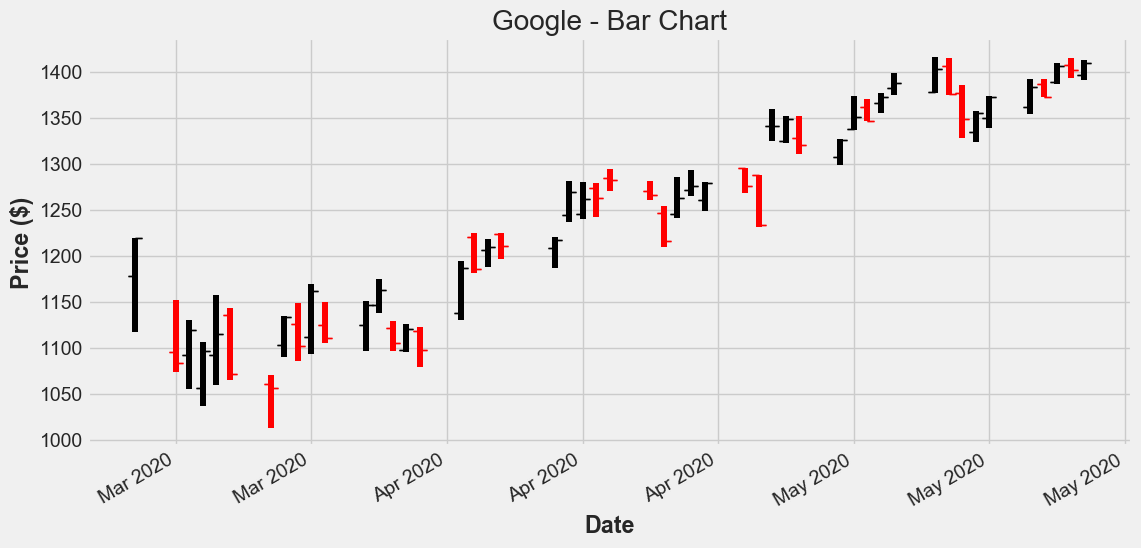

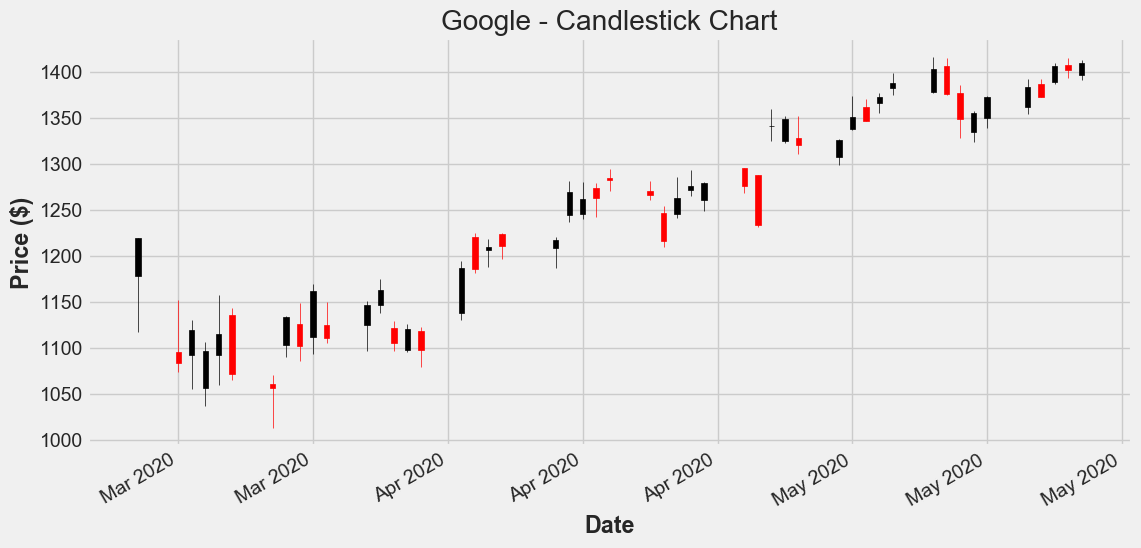

In [41]:
# Loading data into dataframe:
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/GOOG.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Google - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Google - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

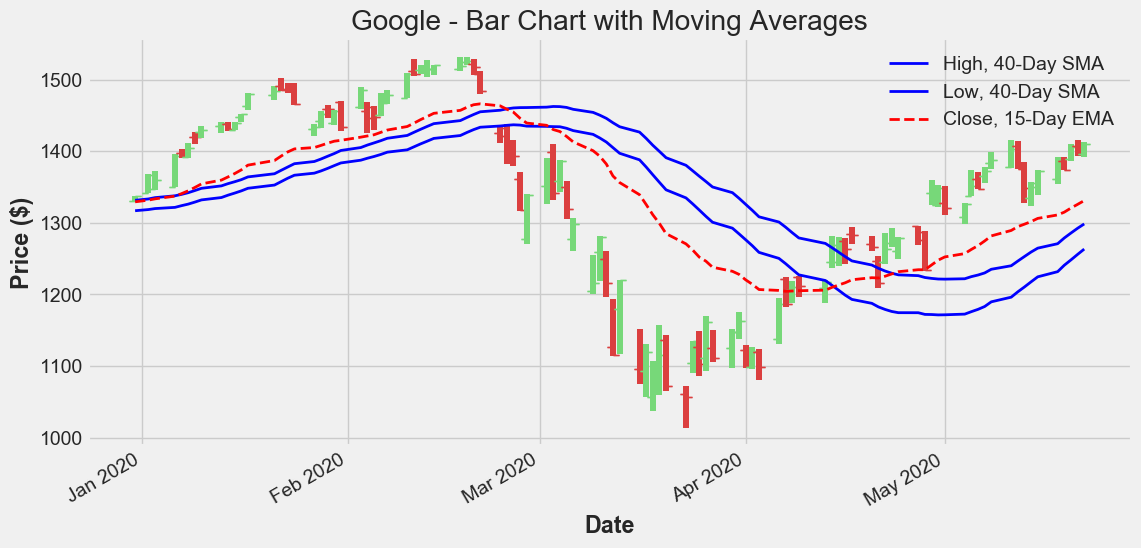

In [42]:
# Loading data into dataframe:
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/GOOG.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Google - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


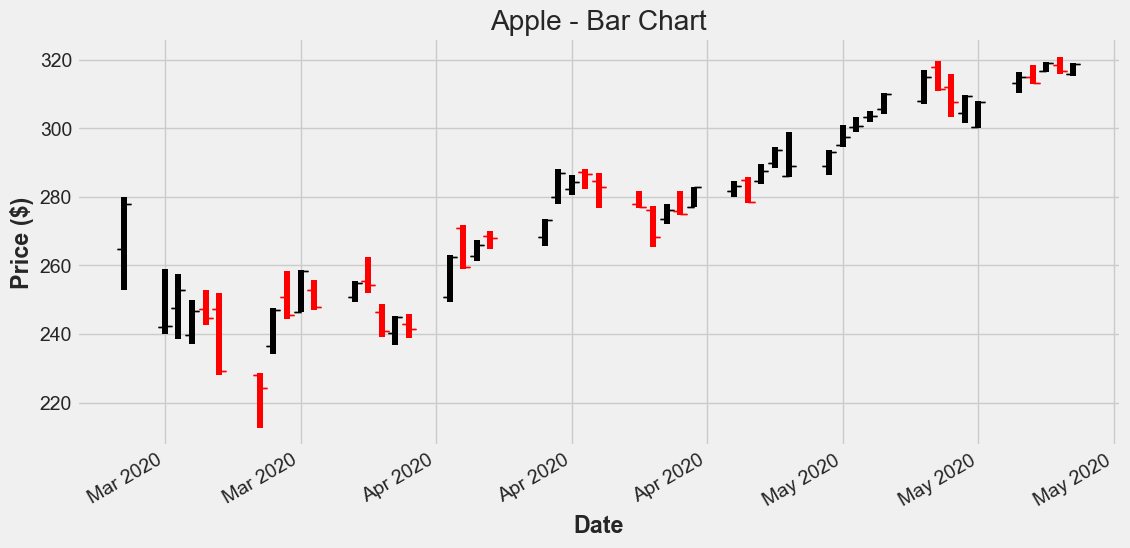

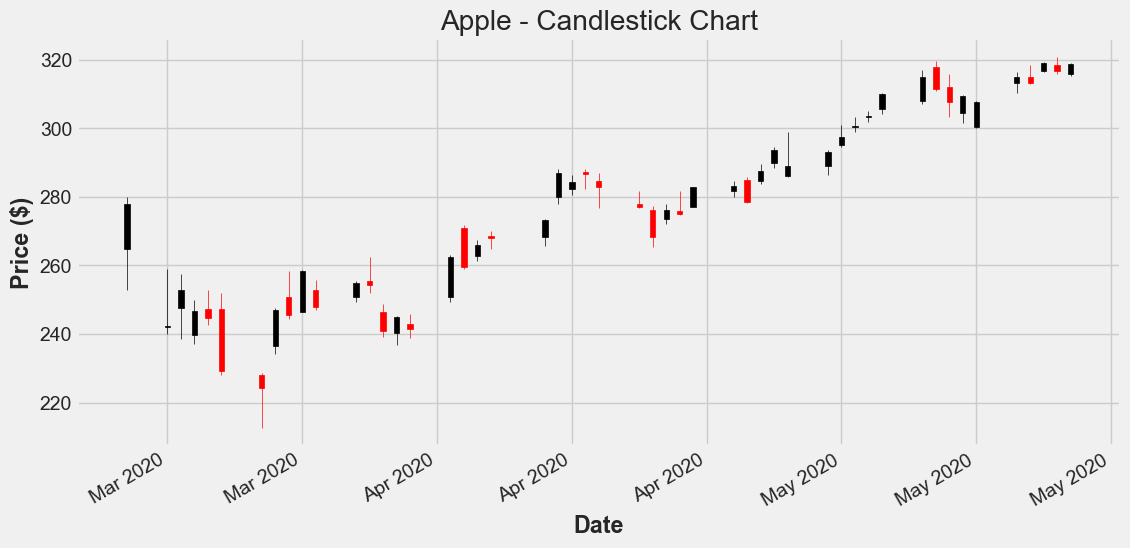

In [43]:
# Loading data into dataframe:
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/AAPL.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

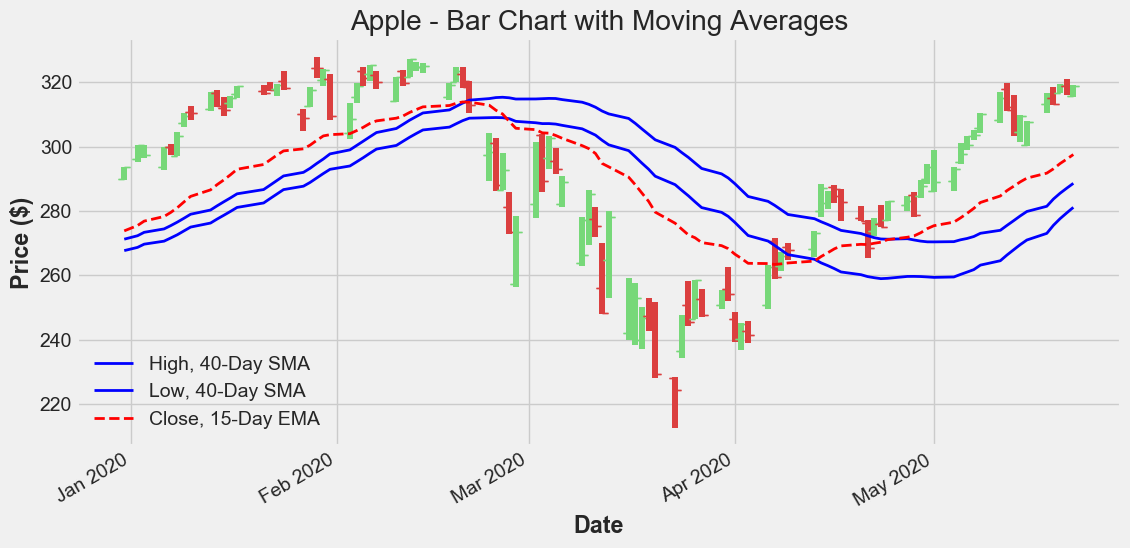

In [44]:
# Loading data into dataframe:
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/AAPL.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


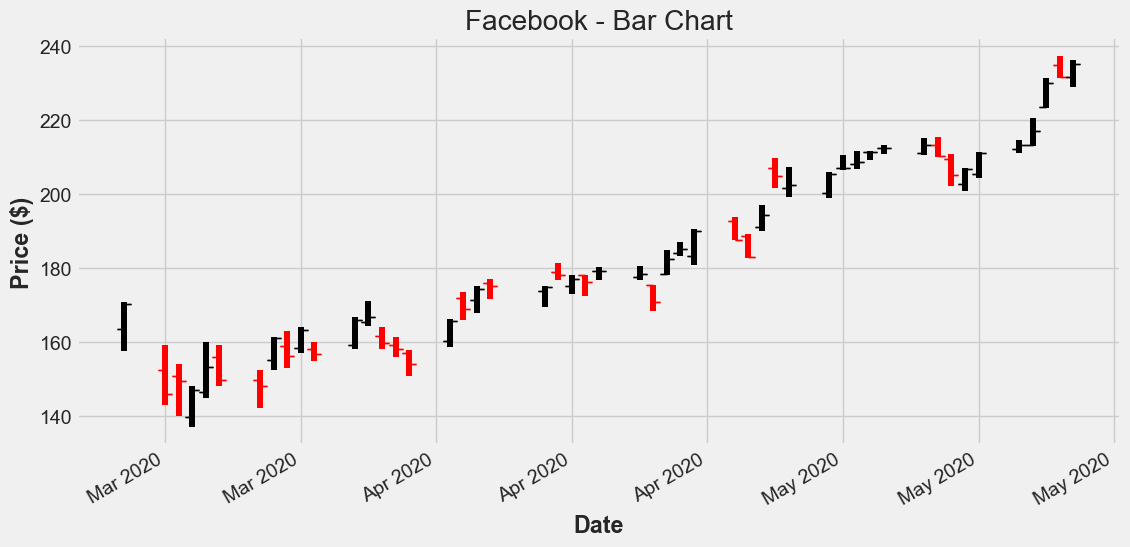

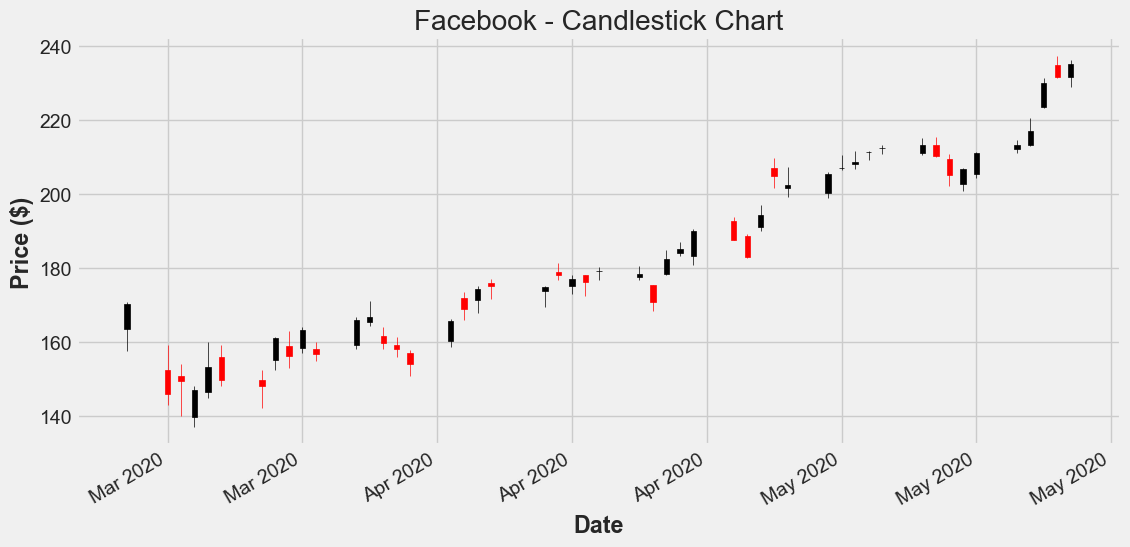

In [45]:
# Loading data into dataframe:
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/FB.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Facebook - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Facebook - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

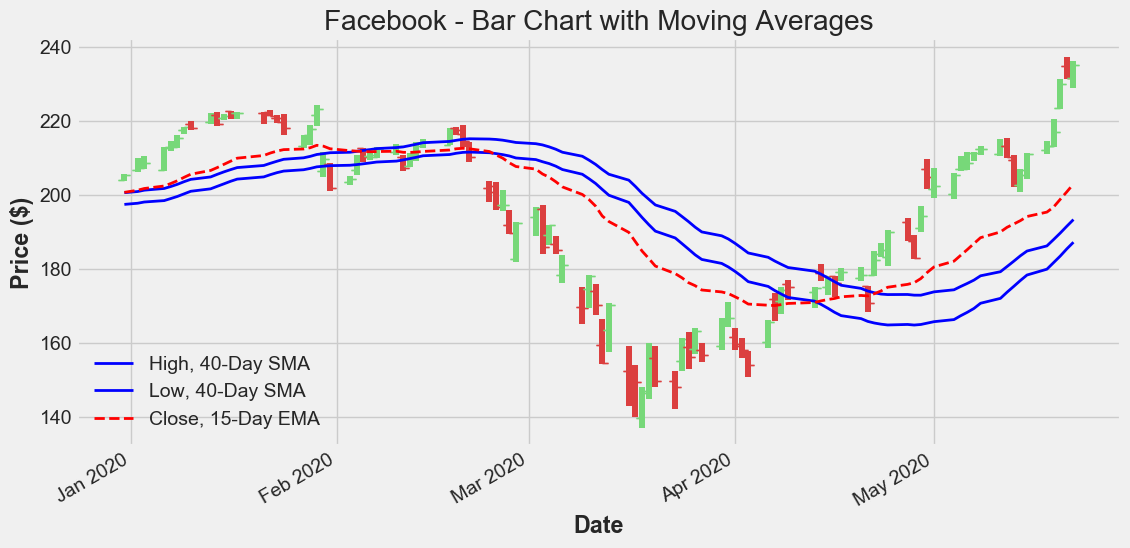

In [46]:
# Loading data into dataframe:
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/FB.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Facebook - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

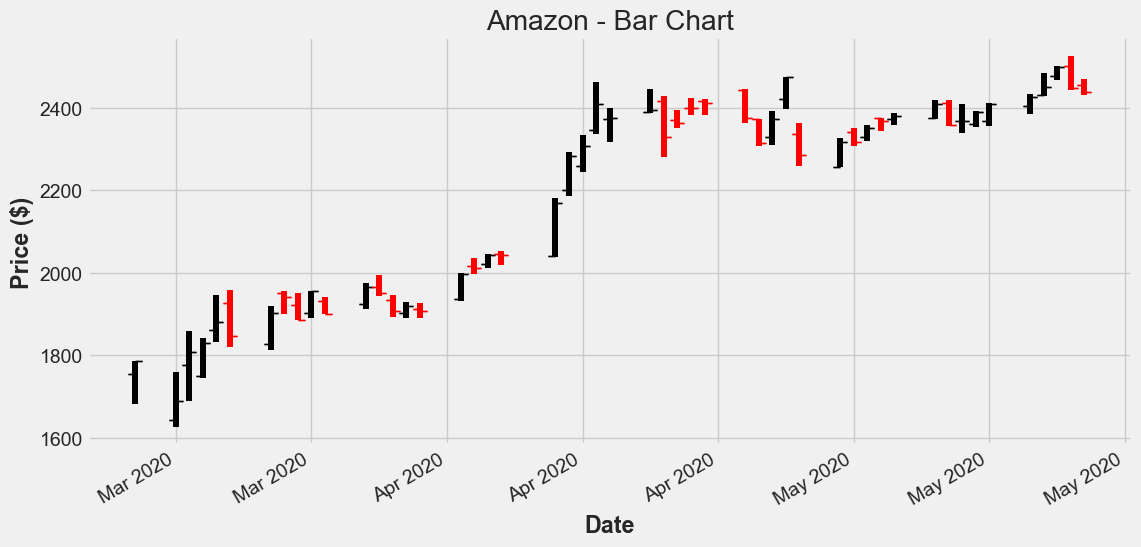

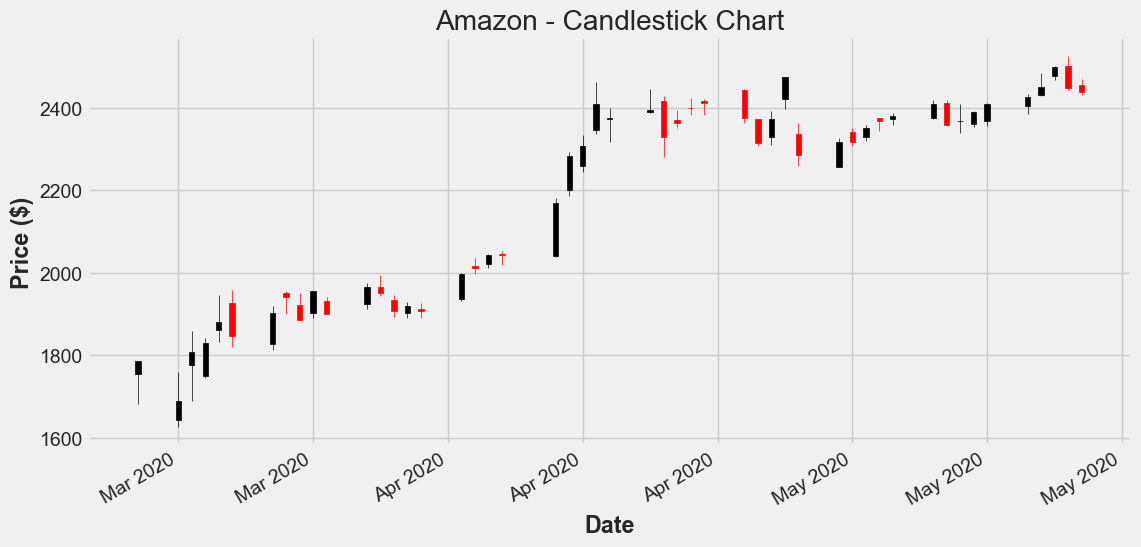

In [47]:
# Loading data into dataframe:
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/AMZN.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

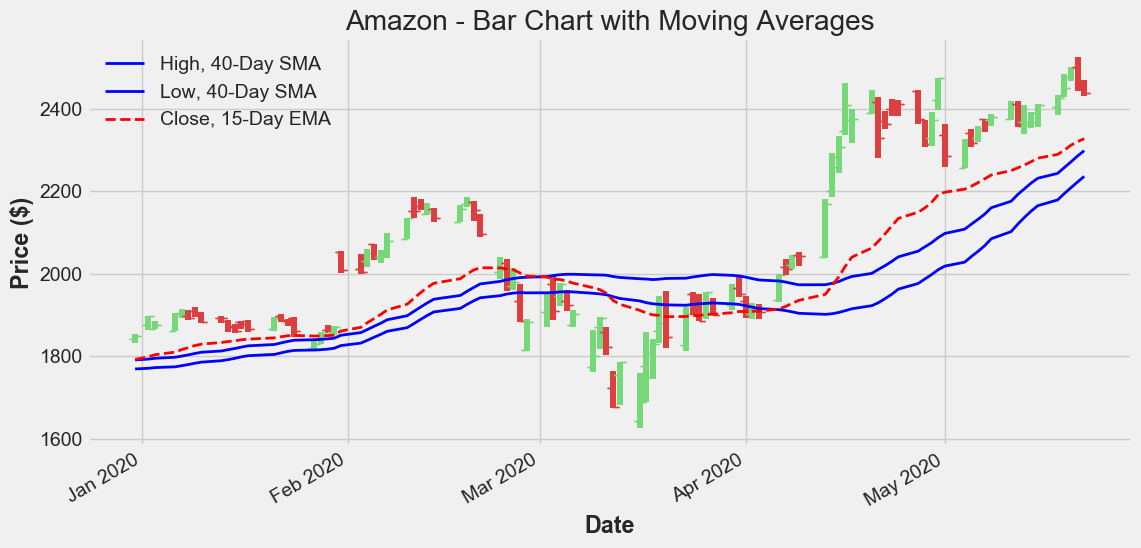

In [48]:
# Loading data into dataframe:
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/AMZN.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


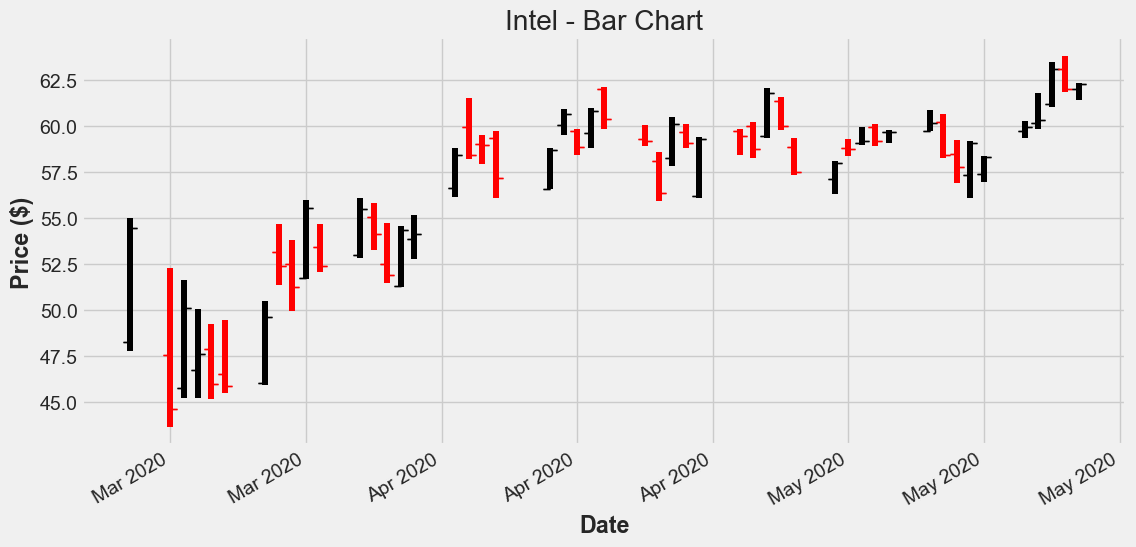

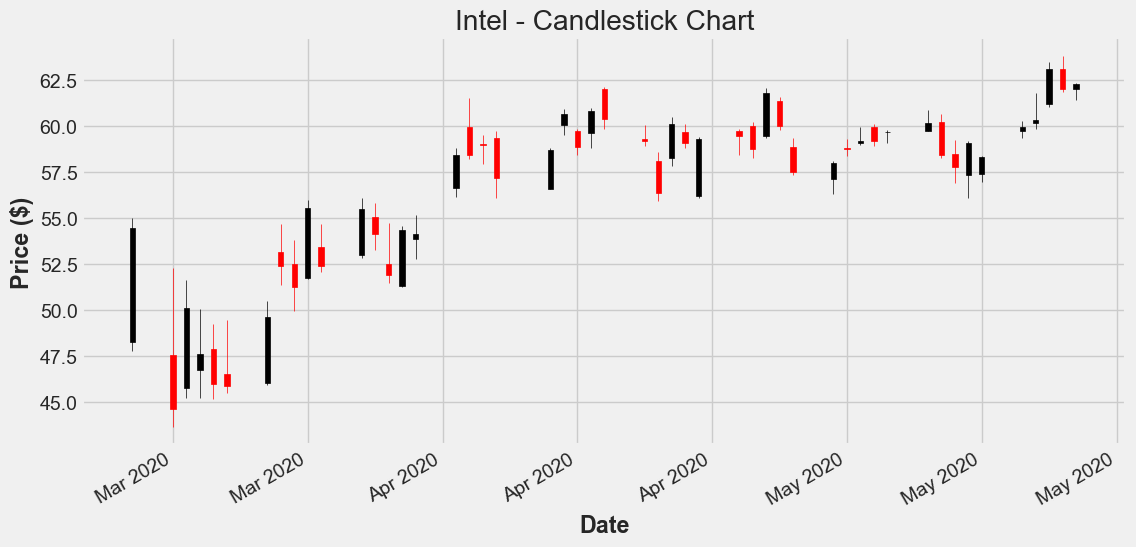

In [49]:
# Loading data into dataframe:
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/INTC.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Intel - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Intel - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

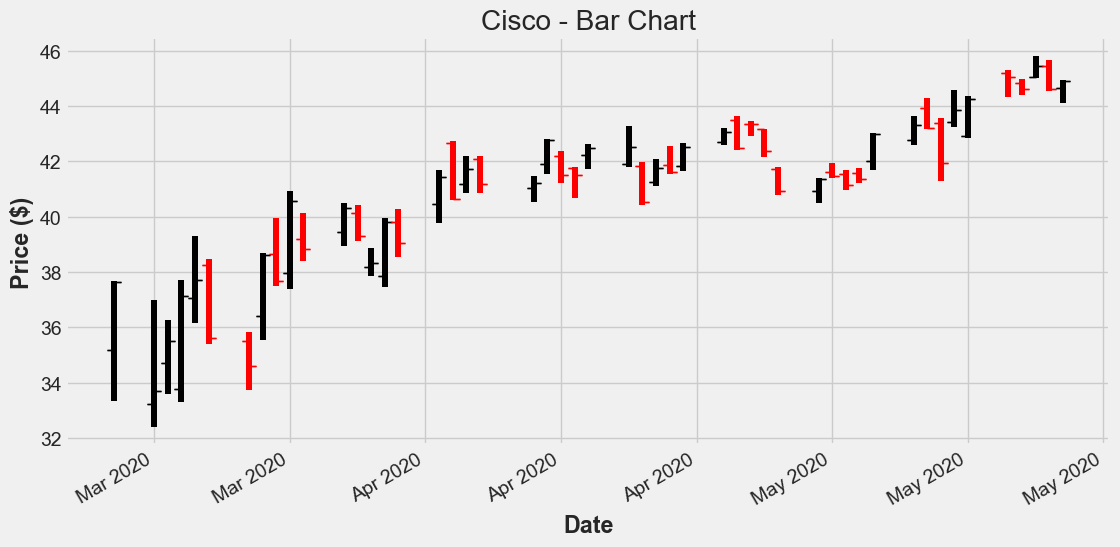

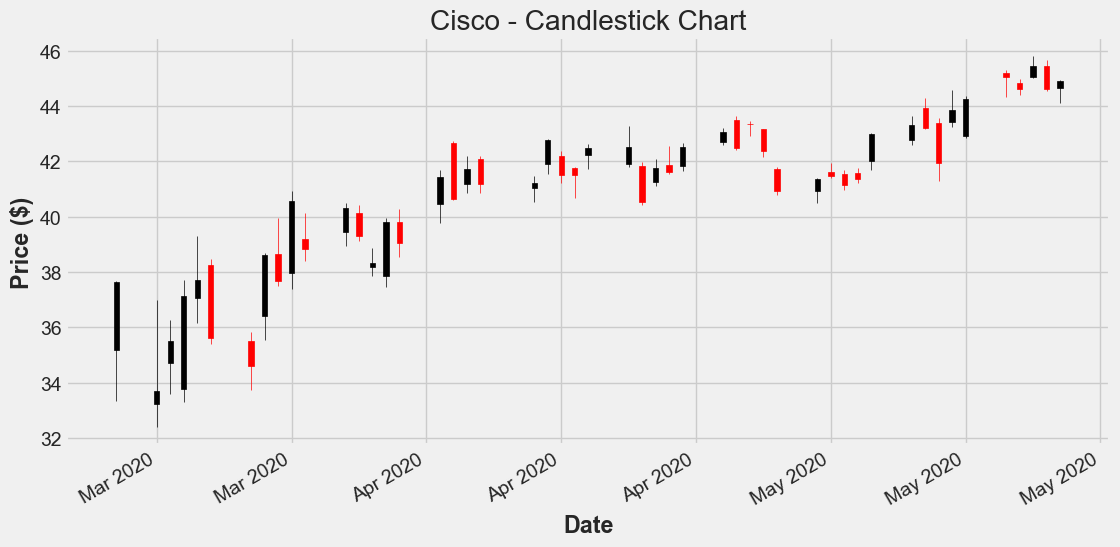

In [50]:
# Loading data into dataframe - Cisco (SCO):
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/CSCO.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Cisco - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Cisco - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

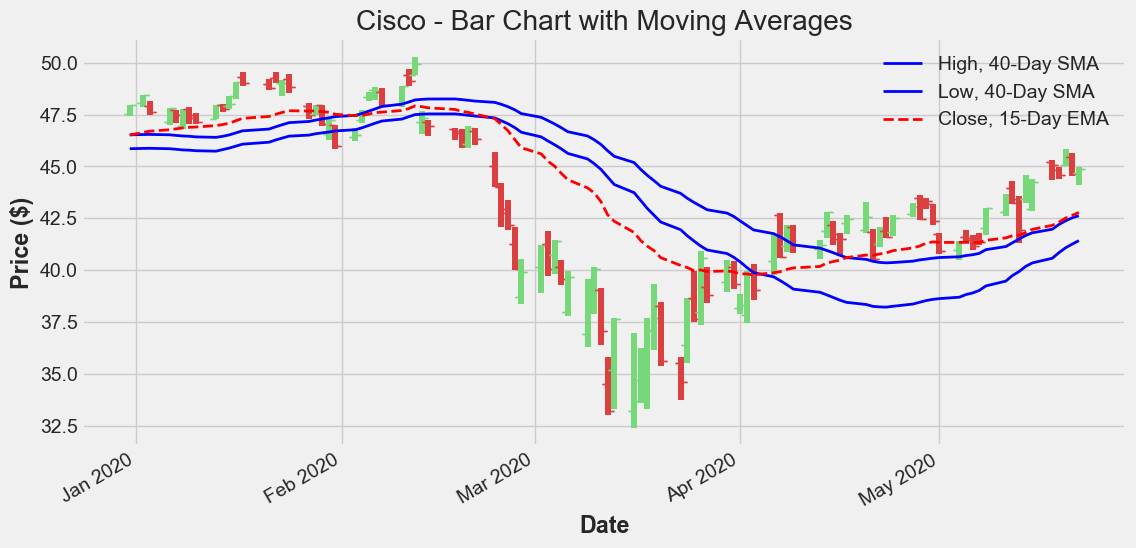

In [51]:
# Loading data into dataframe - Cisco (CSCO):
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/CSCO.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Cisco - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


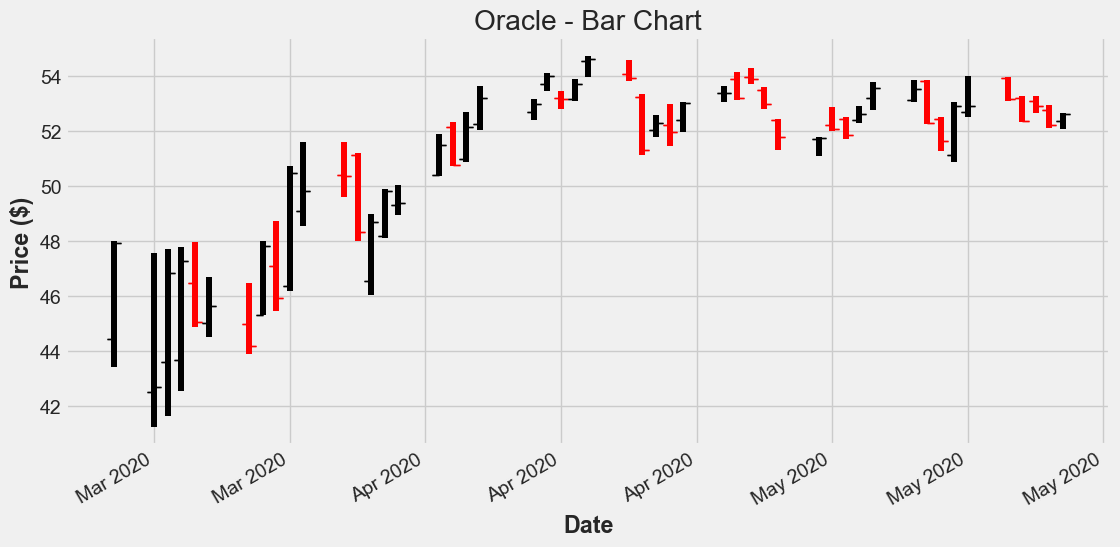

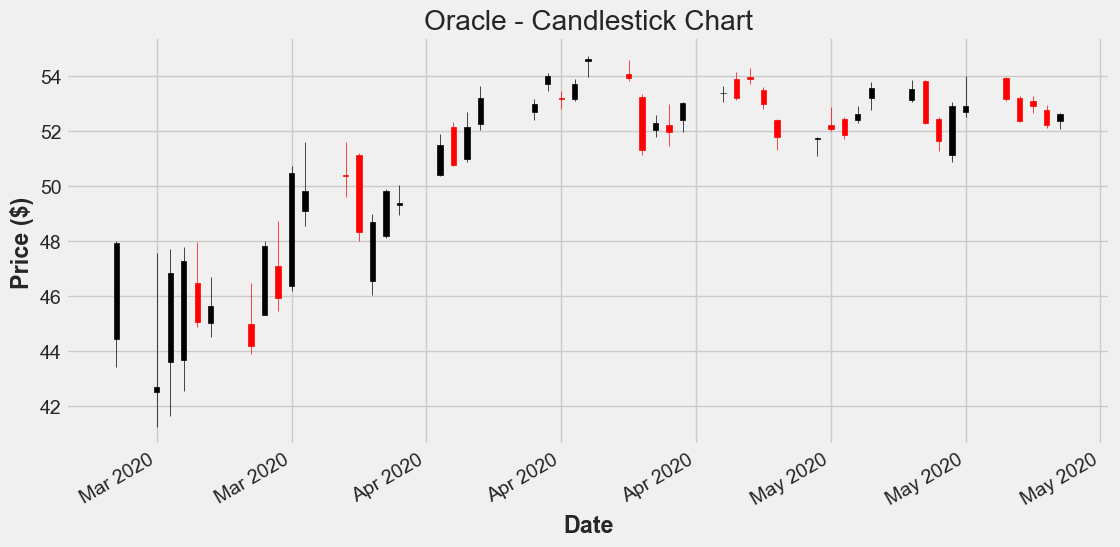

In [52]:
# Loading data into dataframe - Oracle (ORCL):
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/ORCL.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Oracle - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Oracle - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

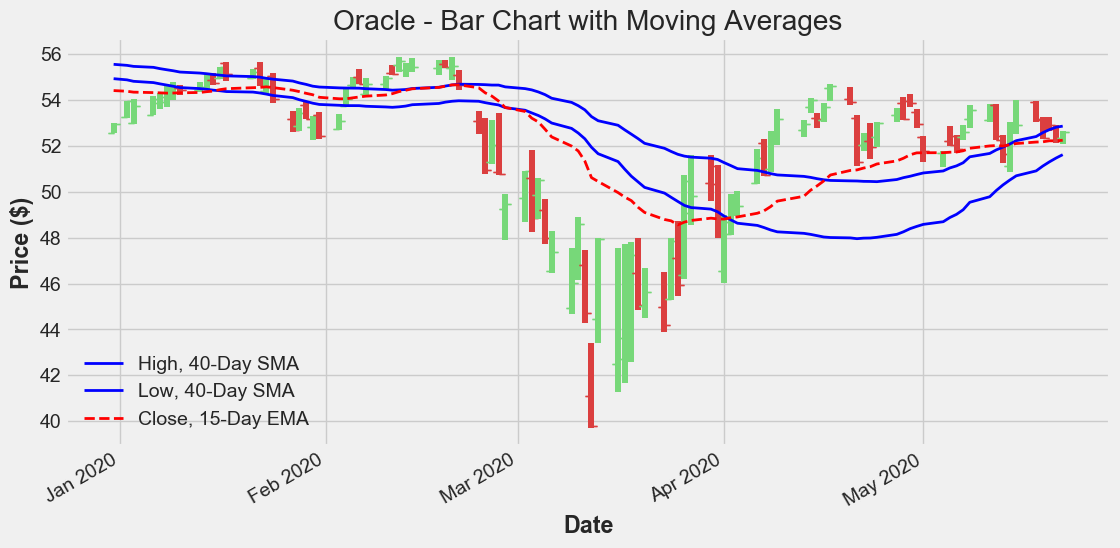

In [53]:
# Loading data into dataframe - Orcale (ORCL):
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/ORCL.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Oracle - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

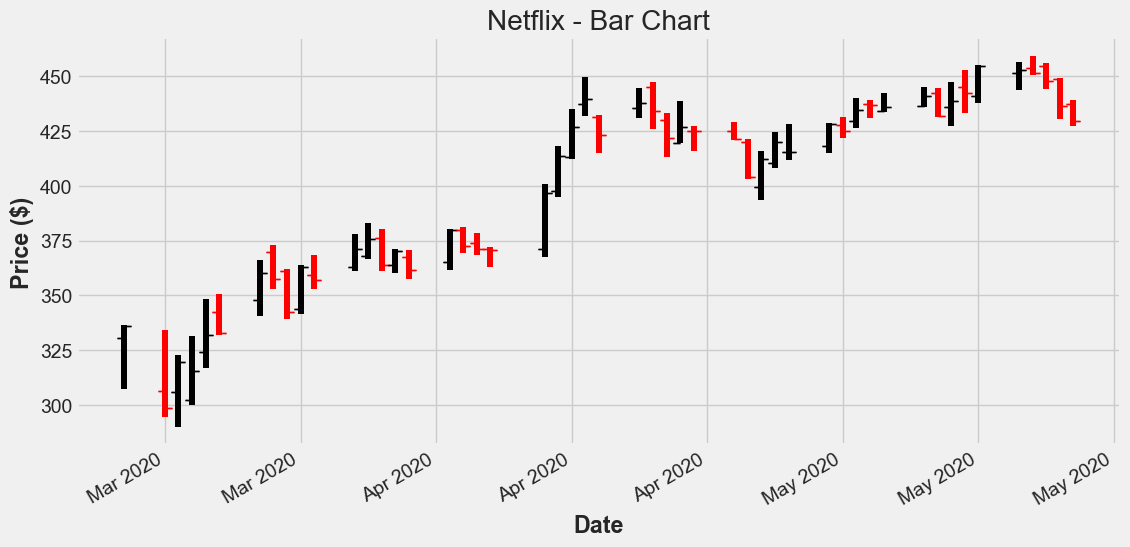

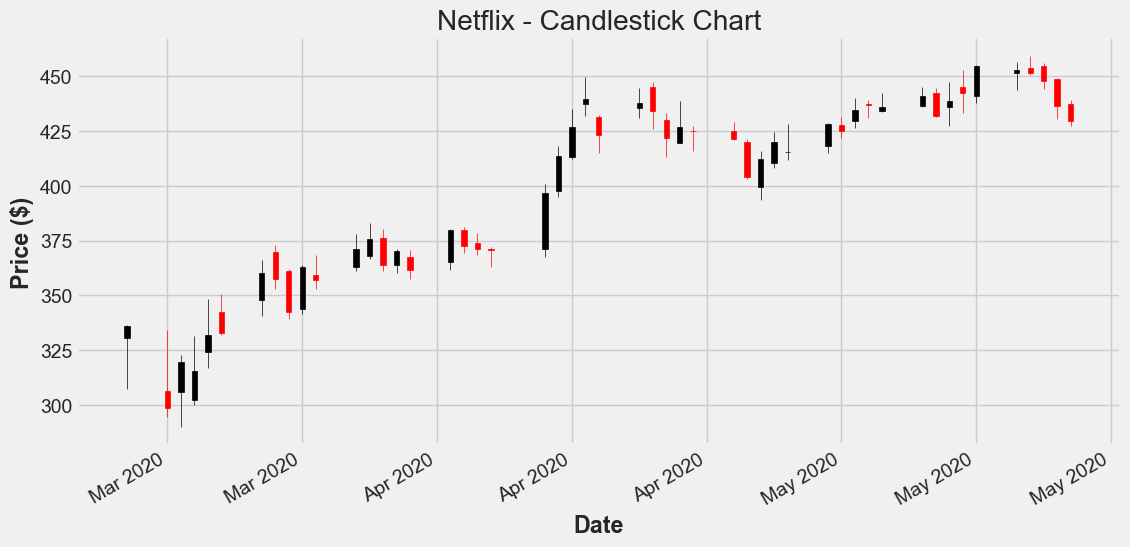

In [54]:
# Loading data into dataframe - Netflix (NFLX):
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/NFLX.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Netflix - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Netflix - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

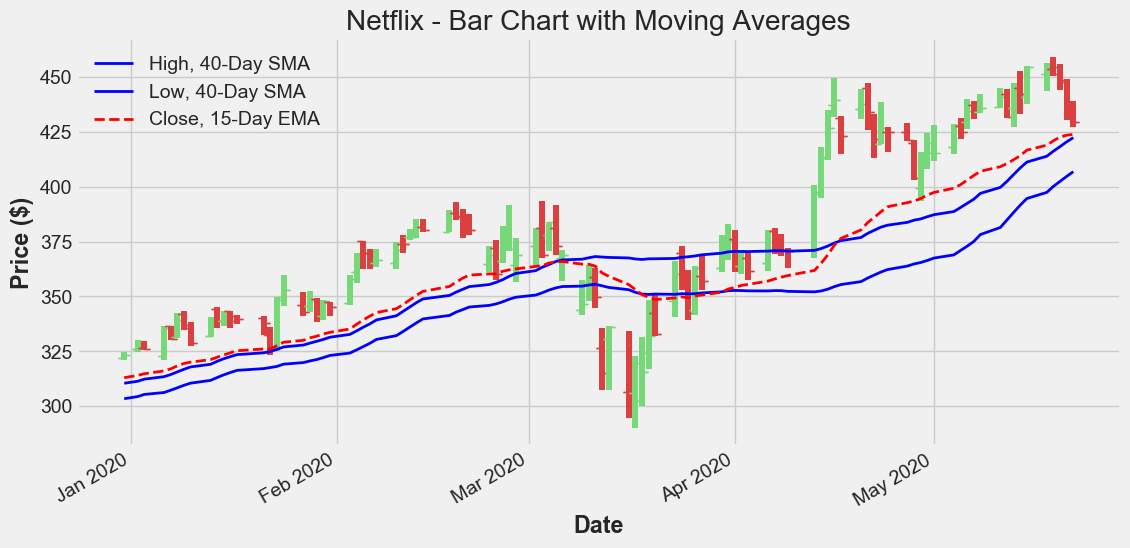

In [55]:
# Loading data into dataframe - Netflix (NFLX):
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/NFLX.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Netflix - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


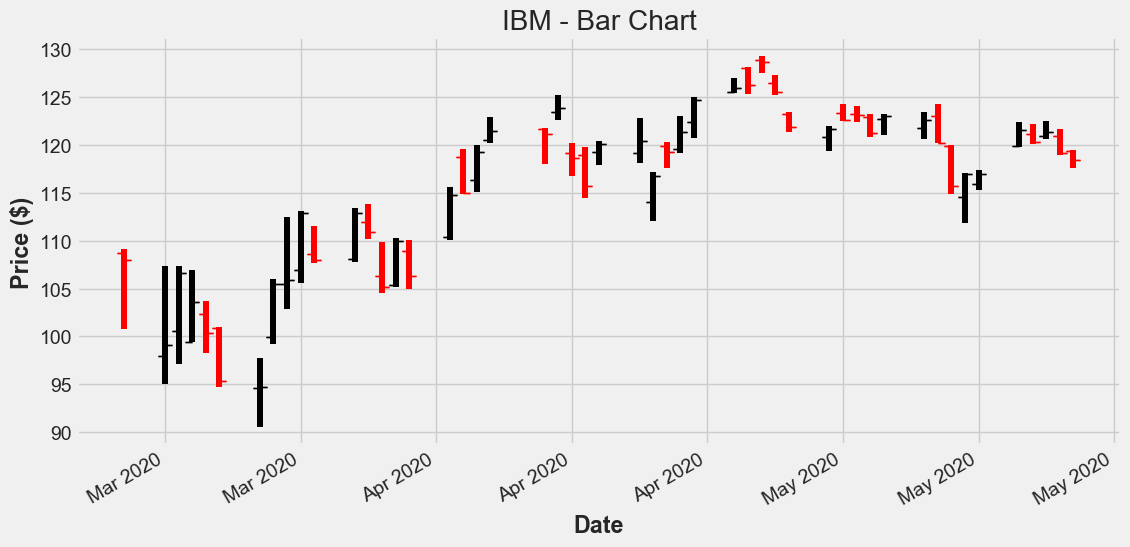

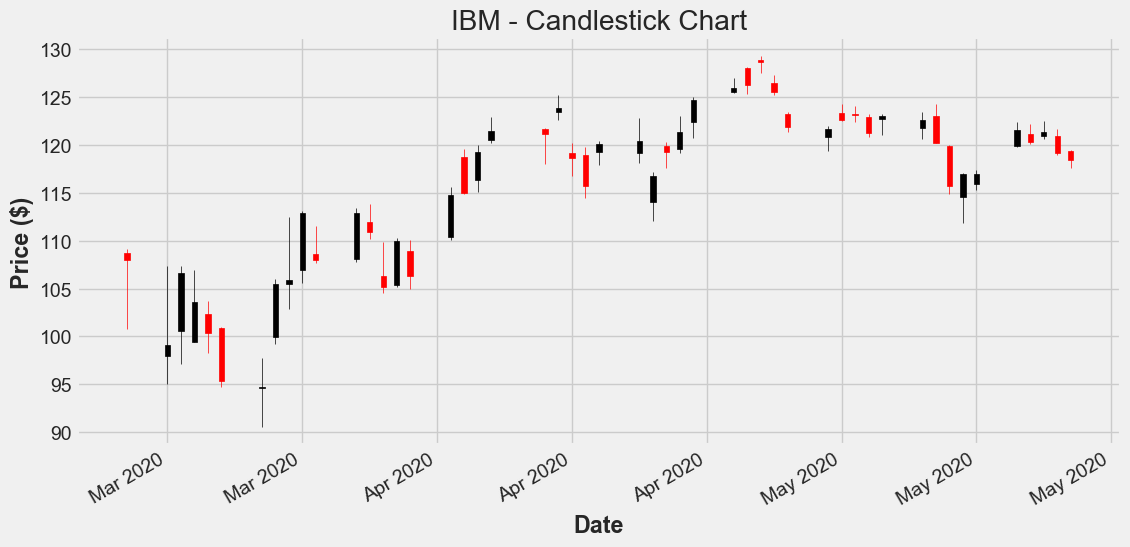

In [56]:
# Loading data into dataframe - IBM (IBM):
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/IBM.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('IBM - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('IBM - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

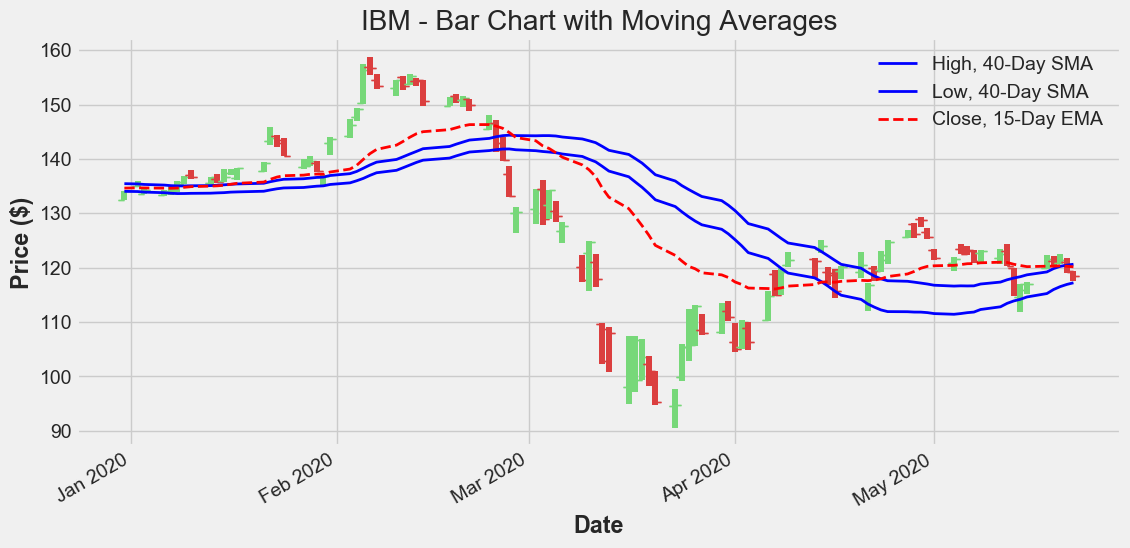

In [57]:
# Loading data into dataframe - IBM (IBM):
datafile = 'C:/Users/JCW/Desktop/Stock_Market_Data_Analysis/stock_dfs/IBM.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('IBM - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


In [58]:
# Two simple moving averages (in blue) create channel:
# Compared to single moving average, 
# there is a gray zone when prices are neither above nor below the channel.
# One exmaple, would be to adopt trading rules such as:
# (1) Enter long positions (BUY) only when price bars completely above higher 40-Day SMA.
# (2) Enter short positions (SELL) only when price bars completely below lower 40-Day SMA.
# (3) Do not enter position (HOLD) - Keep flat on the market when prices between two 40-Day SMAs, 
# or last bar crossing either 40-Day SMA.

# Another example of trading strategy rules could include:
# (1) Enter long positions (BUY) only when 15-Day EMA > the higher 40-Day SMA.
# (2) Enter short positions (SELL) only when 15-Day EMA < the lower 40-Day SMA.
# (3) If else, stay flat (HOLD), for example, when 15-Day EMA is inside the channel created by two SMAs.

# Now, we can ask whether such trading rules could be used to build a profitable trading system. 
# Will such trading strategy rules help generate profits instead of lossess, and
# how to select best set of rules. 

# Next, backtest trading system to calcculate P&L based on historical data.

In [59]:
# Another element for this project, or perhaps a separate project would include fundamental analysis
# Analyzing Financial Statements for Insight into Company's Valuation for Possible Investment
from datetime import datetime
import lxml
from lxml import html
import requests
import numpy as np
import pandas as pd

symbol = 'MFT.NZ'
url = 'https://finance.yahoo.com/quote/MSFT/balance-sheet?p=MSFT'

# Set up the request headers that we're going to use, to simulate
# a request by the Chrome browser. Simulating a request from a browser
# is generally good practice when building a scraper

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Pragma': 'no-cache',
    'Referrer': 'https://google.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'
}

# Fetch the page that we're going to parse, using the request headers
# defined above

page = requests.get(url, headers)

# Parse the page with LXML, so that we can start doing some XPATH queries
# to extract the data that we want

tree = html.fromstring(page.content)

# Smoke test that we fetched the page by fetching and displaying the H1 element

tree.xpath("//h1/text()")

['MSFT - Microsoft Corporation']

In [60]:
table_rows = tree.xpath("//div[contains(@class, 'D(tbr)')]")

# Ensure that some table rows are found; if none are found, then it's possible
# that Yahoo Finance has changed their page layout, or have detected
# that you're scraping the page.

assert len(table_rows) > 0

parsed_rows = []

for table_row in table_rows:
    parsed_row = []
    el = table_row.xpath("./div")
    
    none_count = 0
    
    for rs in el:
        try:
            (text,) = rs.xpath('.//span/text()[1]')
            parsed_row.append(text)
        except ValueError:
            parsed_row.append(np.NaN)
            none_count += 1

    if (none_count < 4):
        parsed_rows.append(parsed_row)

df = pd.DataFrame(parsed_rows)
df

,0,1,2,3,4
0,Breakdown,6/30/2020,6/30/2019,6/30/2018,6/30/2017
1,Total Assets,"301,311,000","286,556,000","258,848,000","241,086,000"
2,Total Liabilities Net Minority Interest,"183,007,000","184,226,000","176,130,000","168,692,000"
3,Total Equity Gross Minority Interest,"118,304,000","102,330,000","82,718,000","72,394,000"
4,Total Capitalization,"177,882,000","168,992,000","154,960,000","148,467,000"
5,Common Stock Equity,"118,304,000","102,330,000","82,718,000","72,394,000"
6,Capital Lease Obligations,"7,671,000","6,188,000","5,568,000",NaN
7,Net Tangible Assets,"67,915,000","52,554,000","38,982,000","27,166,000"
8,Working Capital,"109,605,000","106,132,000","111,174,000","95,324,000"
9,Invested Capital,"181,631,000","174,508,000","158,958,000","158,588,000"
